# How similar are Indonesian Embassies based on their location ?

### Problem Description

<b>Embassy</b> is a representative of a country in other countries, their existence help to indicate a relation among countries and serve as a way to communicate or strengthen the ties. Their location follows a strict and complex requirements both from the country it comes from and the country it resides, usually in a special diplomatic compound or district. Despite all of the careful planning and requirements, the decision to establish an embassy could have come from other necessities such as certain neighborhood/district/area, near to and close from certain amneties, places that could support the embassy mission etc.  

The knowledge of how a certain embassies is similar or different could <b>help give a bigger view to Indonesian Foreign Affairs Officials</b> to understand the general environment their embassies are located. Should a certain embassies need to be treated differently, do embassies with certain criteria experience the same or different stress level of working for their staffs, do certain embassies experience certain disturbance etc.

### What Data Do We Need ?

To accomplish the analysis we will need data on Indonesian Embassies abroad and their latitude and longitude and combine it with data from FourSquare API to get much more data about the embassy's neighborhood, venues and places surrounding the embassy. In which we will cluster and compare each embassy and find similarities between them and group them together.

### Data Gathering

#### 1. List of Indonesian Embassies abroad

Apparently to get data about the list of Indonesian Embassies abroad is going to be a bit difficult, because the Ministry of Foreign Affairs website doesn't display the data easily to be analize. But with the help of google and wikipedia we find a page that we could extract the data that we need.

In [1]:
list_of_ID_embassies = 'https://id.wikipedia.org/wiki/Kedutaan_besar_Republik_Indonesia'

#### Import the libraries that we need

In [1]:
#!conda install -c anaconda beautifulsoup4
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page

#### Get the website page

In [5]:
page_list_of_ID_embassies  = requests.get(list_of_ID_embassies).text
page_list_of_ID_embassies

'<!DOCTYPE html>\n<html class="client-nojs" lang="id" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Kedutaan besar Republik Indonesia - Wikipedia bahasa Indonesia, ensiklopedia bebas</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":[",\\t.",".\\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","Januari","Februari","Maret","April","Mei","Juni","Juli","Agustus","September","Oktober","November","Desember"],"wgRequestId":"3a7aeeb9-cccd-4bcc-ac24-98aa49e1ba29","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Kedutaan_besar_Republik_Indonesia","wgTitle":"Kedutaan besar Republik Indonesia","wgCurRevisionId":18023174,"wgRevisionId":18023174,"wgArticleId":28406,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Artikel dengan pranala luar nonaktif","Artikel dengan prana

#### Extract the website page for table of Indonesian Embassies

In [7]:
soup = BeautifulSoup(page_list_of_ID_embassies,"html5lib")

In [9]:
table = soup.find('table')
table

<table class="wikitable sortable" style="text-align: center;">

<tbody><tr>
<th>Perwakilan
</th>
<th>Duta Besar
</th>
<th>Pelantikan
</th>
<th>Website
</th>
<th>Merangkap
</th>
<th>Daftar
</th>
<th>Ref.
</th></tr>
<tr>
<td align="left"><span class="flagicon"><img alt="" class="thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Afghanistan.svg/23px-Flag_of_Afghanistan.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Afghanistan.svg/35px-Flag_of_Afghanistan.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Afghanistan.svg/45px-Flag_of_Afghanistan.svg.png 2x" width="23"/> </span><a href="/wiki/Afganistan" title="Afganistan">Afganistan</a>
</td>
<td><a href="/wiki/Arief_Rachman" title="Arief Rachman">Arief Rachman</a>
</td>
<td>13 Maret 2017
</td>
<td><a href="/wiki/Kedutaan_Besar_Republik_Indonesia_di_Kabul" title="Kedutaan Besar Republik

#### Table consists of Country , Ambassador, Inauguration, Website (Country Capital), Include, List, Ref

In [270]:
table_embassies=[] #List of ID Embassies
rows = table.findAll('tr')
for num, row in enumerate(rows, start=0):
    if num != 0 : #Skip the table header information
        cell = {}
        row_data = row.findAll('td')
        cell['Country'] = row_data[0].text
        cell['Capital'] = row_data[3].text
        table_embassies.append(cell)

#### See the top 10

In [271]:
table_embassies[:10]

[{'Country': '\xa0Afganistan\n', 'Capital': 'Kabul [1]\n'},
 {'Country': '\xa0Afrika Selatan\n', 'Capital': 'Pretoria [2]\n'},
 {'Country': '\xa0Aljazair\n', 'Capital': 'Algiers\n'},
 {'Country': '\xa0Amerika Serikat\n', 'Capital': 'Washington, D.C. [3]\n'},
 {'Country': '\xa0Arab Saudi\n', 'Capital': 'Riyadh\n'},
 {'Country': '\xa0Argentina\n', 'Capital': 'Buenos Aires [4]\n'},
 {'Country': '\xa0Australia\n', 'Capital': 'Canberra [5]\n'},
 {'Country': '\xa0Austria\n', 'Capital': 'Wina\n'},
 {'Country': '\xa0Azerbaijan\n', 'Capital': 'Baku\n'},
 {'Country': '\xa0Bahrain\n', 'Capital': 'Manama [6]\n'}]

#### Import pandas

In [2]:
import pandas as pd
pd.set_option('display.max_rows', None) #Need to see all the rows

In [273]:
df_ID_embassies=pd.DataFrame(table_embassies)

In [274]:
df_ID_embassies.head(200)

Country                     Capital
0                Afganistan\n                 Kabul [1]\n
1            Afrika Selatan\n              Pretoria [2]\n
2                  Aljazair\n                   Algiers\n
3           Amerika Serikat\n      Washington, D.C. [3]\n
4                Arab Saudi\n                    Riyadh\n
5                 Argentina\n          Buenos Aires [4]\n
6                 Australia\n              Canberra [5]\n
7                   Austria\n                      Wina\n
8                Azerbaijan\n                      Baku\n
9                   Bahrain\n                Manama [6]\n
10               Bangladesh\n                 Dhaka [7]\n
11                  Belanda\n              Den Haag [8]\n
12                   Belgia\n              Brussels [9]\n
13   Bosnia dan Herzegovina\n                  Sarajevo\n
14                   Brasil\n             Brasilia [10]\n
15            Britania Raya\n               London [11]\n
16                   Brunei\n  Bandar Seri Begawan [12]\n
17                 Bulgaria\n                     Sofia\n
18                     Ceko\n                Praha [13]\n
19                    Chili\n                  Santiago\n
20                  Denmark\n           Kopenhagen [14]\n
21                  Ekuador\n                     Quito\n
22                  Etiopia\n          Addis Ababa [15]\n
23                     Fiji\n                      Suva\n
24                 Filipina\n                    Manila\n
25                Finlandia\n             Helsinki [16]\n
26                 Hongaria\n             Budapest [17]\n
27                    India\n                 New Delhi\n
28                     Irak\n                   Baghdad\n
29                     Iran\n                    Tehran\n
30                   Italia\n                      Rome\n
31                   Jepang\n                Tokyo [18]\n
32                   Jerman\n               Berlin [19]\n
33                  Kamboja\n                Phnom Penh\n
34                  Kamerun\n                   Yaounde\n
35                   Kanada\n                    Ottawa\n
36               Kazakhstan\n                    Astana\n
37                    Kenya\n                   Nairobi\n
38                 Kolombia\n               Bogota [20]\n
39            Korea Selatan\n                     Seoul\n
40              Korea Utara\n            Pyongyang [21]\n
41                  Kroasia\n                    Zagreb\n
42                     Kuba\n               Havana [22]\n
43                   Kuwait\n          Kuwait City [23]\n
44                     Laos\n                 Vientiane\n
45                  Lebanon\n               Beirut [24]\n
46                    Libya\n                   Tripoli\n
47                 Malaysia\n         Kuala Lumpur [25]\n
48                   Maroko\n                     Rabat\n
49                  Meksiko\n               Mexico City\n
50                    Mesir\n                Kairo [26]\n
51                 Mozambik\n                    Maputo\n
52                  Myanmar\n                    Yangon\n
53                  Namibia\n             Windhoek [27]\n
54                  Nigeria\n                Abuja [28]\n
55                 Norwegia\n                 Oslo [29]\n
56                     Oman\n                    Muscat\n
57                 Pakistan\n            Islamabad [30]\n
58                   Panama\n                    Panama\n
59             Papua Nugini\n              Port Moresby\n
60            PBB di Jenewa\n                    Jenewa\n
61          PBB di New York\n             New York City\n
62                  Perbara\n           Jakarta[cat. 1]\n
63                     Peru\n                 Lima [31]\n
64                 Polandia\n              Warsawa [32]\n
65                 Portugal\n              Lisabon [33]\n
66                  Prancis\n                Paris [34]\n
67                    Qatar\n                 Doha [35]\n
68                  

There are 98 Indonesian Embassies according to our data

#### Clean the data to avoid problems later

1. Get rid of the '\n'
2. Get rid of the []

In [275]:
df_ID_embassies['Country'] = df_ID_embassies['Country'].replace(f'(\n)', '',regex=True)
df_ID_embassies['Capital'] = df_ID_embassies['Capital'].replace(f'(\n)', '',regex=True)
df_ID_embassies['Capital'] = df_ID_embassies['Capital'].replace(f'(\[\d+\])', '',regex=True) #inside [] with one more digits

In [276]:
df_ID_embassies.head(100)

Country               Capital
0                Afganistan                Kabul 
1            Afrika Selatan             Pretoria 
2                  Aljazair               Algiers
3           Amerika Serikat     Washington, D.C. 
4                Arab Saudi                Riyadh
5                 Argentina         Buenos Aires 
6                 Australia             Canberra 
7                   Austria                  Wina
8                Azerbaijan                  Baku
9                   Bahrain               Manama 
10               Bangladesh                Dhaka 
11                  Belanda             Den Haag 
12                   Belgia             Brussels 
13   Bosnia dan Herzegovina              Sarajevo
14                   Brasil             Brasilia 
15            Britania Raya               London 
16                   Brunei  Bandar Seri Begawan 
17                 Bulgaria                 Sofia
18                     Ceko                Praha 
19                    Chili              Santiago
20                  Denmark           Kopenhagen 
21                  Ekuador                 Quito
22                  Etiopia          Addis Ababa 
23                     Fiji                  Suva
24                 Filipina                Manila
25                Finlandia             Helsinki 
26                 Hongaria             Budapest 
27                    India             New Delhi
28                     Irak               Baghdad
29                     Iran                Tehran
30                   Italia                  Rome
31                   Jepang                Tokyo 
32                   Jerman               Berlin 
33                  Kamboja            Phnom Penh
34                  Kamerun               Yaounde
35                   Kanada                Ottawa
36               Kazakhstan                Astana
37                    Kenya               Nairobi
38                 Kolombia               Bogota 
39            Korea Selatan                 Seoul
40              Korea Utara            Pyongyang 
41                  Kroasia                Zagreb
42                     Kuba               Havana 
43                   Kuwait          Kuwait City 
44                     Laos             Vientiane
45                  Lebanon               Beirut 
46                    Libya               Tripoli
47                 Malaysia         Kuala Lumpur 
48                   Maroko                 Rabat
49                  Meksiko           Mexico City
50                    Mesir                Kairo 
51                 Mozambik                Maputo
52                  Myanmar                Yangon
53                  Namibia             Windhoek 
54                  Nigeria                Abuja 
55                 Norwegia                 Oslo 
56                     Oman                Muscat
57                 Pakistan            Islamabad 
58                   Panama                Panama
59             Papua Nugini          Port Moresby
60            PBB di Jenewa                Jenewa
61          PBB di New York         New York City
62                  Perbara       Jakarta[cat. 1]
63                     Peru                 Lima 
64                 Polandia              Warsawa 
65                 Portugal              Lisabon 
66                  Prancis                Paris 
67                    Qatar                 Doha 
68                  Rumania              Bukares 
69                    Rusia               Moskwa 
70            Selandia Baru            Wellington
71                  Senegal                 Dakar
72                   Serbia               Beograd
73                Singapura             Singapura
74                 Slowakia            Bratislava
75                  Spanyol               Madrid 
76                Sri Lanka              Kolombo 
77                    Sudan              Khartoum
78                   Suriah             Damaskus 
79                 S

3. Drop Perbara since it's location is in Jakarta Indonesia Capital not abroad 

In [277]:
df_ID_embassies = df_ID_embassies.drop(62)

4. Drop Taiwan since Indonesia doesn't have an embassy there

In [278]:
df_ID_embassies = df_ID_embassies.drop(82)

5. Change Washington, D.C to Washington

In [279]:
df_ID_embassies.loc[3,'Capital'] ='Washington'

6. Drop Kamerun since it's handle by the embassy in Nigeria

In [280]:
df_ID_embassies = df_ID_embassies.drop(34)

7. Change Kairo to Cairo

In [281]:
df_ID_embassies.loc[50,'Capital'] ='Cairo'

8. Drop Indonesia Representative for the UN

In [282]:
df_ID_embassies = df_ID_embassies.drop(60)
df_ID_embassies = df_ID_embassies.drop(61)

9. Change Bukares to Bucharest

In [283]:
df_ID_embassies.loc[68,'Capital'] ='Bucharest'

10. Change Moskwa to Moscow

In [284]:
df_ID_embassies.loc[69,'Capital'] ='Moscow'

11. Change Kolombo to Colombo

In [285]:
df_ID_embassies.loc[76,'Capital'] ='Colombo'

12. Change Damaskus to Damascus

In [286]:
df_ID_embassies.loc[78,'Capital'] ='Damascus'

13. Change Vatikan to Vatican

In [287]:
df_ID_embassies.loc[83,'Capital'] ='Vatican'

In [288]:
df_ID_embassies = df_ID_embassies.reset_index(drop=True)
df_ID_embassies

Country               Capital
0                Afganistan                Kabul 
1            Afrika Selatan             Pretoria 
2                  Aljazair               Algiers
3           Amerika Serikat            Washington
4                Arab Saudi                Riyadh
5                 Argentina         Buenos Aires 
6                 Australia             Canberra 
7                   Austria                  Wina
8                Azerbaijan                  Baku
9                   Bahrain               Manama 
10               Bangladesh                Dhaka 
11                  Belanda             Den Haag 
12                   Belgia             Brussels 
13   Bosnia dan Herzegovina              Sarajevo
14                   Brasil             Brasilia 
15            Britania Raya               London 
16                   Brunei  Bandar Seri Begawan 
17                 Bulgaria                 Sofia
18                     Ceko                Praha 
19                    Chili              Santiago
20                  Denmark           Kopenhagen 
21                  Ekuador                 Quito
22                  Etiopia          Addis Ababa 
23                     Fiji                  Suva
24                 Filipina                Manila
25                Finlandia             Helsinki 
26                 Hongaria             Budapest 
27                    India             New Delhi
28                     Irak               Baghdad
29                     Iran                Tehran
30                   Italia                  Rome
31                   Jepang                Tokyo 
32                   Jerman               Berlin 
33                  Kamboja            Phnom Penh
34                   Kanada                Ottawa
35               Kazakhstan                Astana
36                    Kenya               Nairobi
37                 Kolombia               Bogota 
38            Korea Selatan                 Seoul
39              Korea Utara            Pyongyang 
40                  Kroasia                Zagreb
41                     Kuba               Havana 
42                   Kuwait          Kuwait City 
43                     Laos             Vientiane
44                  Lebanon               Beirut 
45                    Libya               Tripoli
46                 Malaysia         Kuala Lumpur 
47                   Maroko                 Rabat
48                  Meksiko           Mexico City
49                    Mesir                 Cairo
50                 Mozambik                Maputo
51                  Myanmar                Yangon
52                  Namibia             Windhoek 
53                  Nigeria                Abuja 
54                 Norwegia                 Oslo 
55                     Oman                Muscat
56                 Pakistan            Islamabad 
57                   Panama                Panama
58             Papua Nugini          Port Moresby
59                     Peru                 Lima 
60                 Polandia              Warsawa 
61                 Portugal              Lisabon 
62                  Prancis                Paris 
63                    Qatar                 Doha 
64                  Rumania             Bucharest
65                    Rusia                Moscow
66            Selandia Baru            Wellington
67                  Senegal                 Dakar
68                   Serbia               Beograd
69                Singapura             Singapura
70                 Slowakia            Bratislava
71                  Spanyol               Madrid 
72                Sri Lanka              Damascus
73                    Sudan              Khartoum
74                   Suriah             Damaskus 
75                 Suriname            Paramaribo
76                   Swedia            Stockholm 
77                    Swiss                 Bern 
78              Takhta Suci               Vatican
79                 T

#### Save the data

In [289]:
df_ID_embassies.to_csv('ID_Embassies.csv')

In [27]:
df_ID_embassies = pd.read_csv('ID_Embassies.csv',index_col=0)
df_ID_embassies

Country               Capital
0                Afganistan                Kabul 
1            Afrika Selatan             Pretoria 
2                  Aljazair               Algiers
3           Amerika Serikat            Washington
4                Arab Saudi                Riyadh
5                 Argentina         Buenos Aires 
6                 Australia             Canberra 
7                   Austria                  Wina
8                Azerbaijan                  Baku
9                   Bahrain               Manama 
10               Bangladesh                Dhaka 
11                  Belanda             Den Haag 
12                   Belgia             Brussels 
13   Bosnia dan Herzegovina              Sarajevo
14                   Brasil             Brasilia 
15            Britania Raya               London 
16                   Brunei  Bandar Seri Begawan 
17                 Bulgaria                 Sofia
18                     Ceko                Praha 
19                    Chili              Santiago
20                  Denmark           Kopenhagen 
21                  Ekuador                 Quito
22                  Etiopia          Addis Ababa 
23                     Fiji                  Suva
24                 Filipina                Manila
25                Finlandia             Helsinki 
26                 Hongaria             Budapest 
27                    India             New Delhi
28                     Irak               Baghdad
29                     Iran                Tehran
30                   Italia                  Rome
31                   Jepang                Tokyo 
32                   Jerman               Berlin 
33                  Kamboja            Phnom Penh
34                   Kanada                Ottawa
35               Kazakhstan                Astana
36                    Kenya               Nairobi
37                 Kolombia               Bogota 
38            Korea Selatan                 Seoul
39              Korea Utara            Pyongyang 
40                  Kroasia                Zagreb
41                     Kuba               Havana 
42                   Kuwait          Kuwait City 
43                     Laos             Vientiane
44                  Lebanon               Beirut 
45                    Libya               Tripoli
46                 Malaysia         Kuala Lumpur 
47                   Maroko                 Rabat
48                  Meksiko           Mexico City
49                    Mesir                 Cairo
50                 Mozambik                Maputo
51                  Myanmar                Yangon
52                  Namibia             Windhoek 
53                  Nigeria                Abuja 
54                 Norwegia                 Oslo 
55                     Oman                Muscat
56                 Pakistan            Islamabad 
57                   Panama                Panama
58             Papua Nugini          Port Moresby
59                     Peru                 Lima 
60                 Polandia              Warsawa 
61                 Portugal              Lisabon 
62                  Prancis                Paris 
63                    Qatar                 Doha 
64                  Rumania             Bucharest
65                    Rusia                Moscow
66            Selandia Baru            Wellington
67                  Senegal                 Dakar
68                   Serbia               Beograd
69                Singapura             Singapura
70                 Slowakia            Bratislava
71                  Spanyol               Madrid 
72                Sri Lanka              Damascus
73                    Sudan              Khartoum
74                   Suriah             Damaskus 
75                 Suriname            Paramaribo
76                   Swedia            Stockholm 
77                    Swiss                 Bern 
78              Takhta Suci               Vatican
79                 T

so the final tally is 93 Indonesian Embassies abroad

#### 2. Get Indonesian Embassies address

Since there are no data on latitude and longitude of the embassies, we need to get it's address can convert it later. This is also a problem since the data is not available easily to be extracted and analize. But there are similarities in the embassy website that we could explore

https://kemlu.go.id/CAPITAL

In [24]:
capitals = df_ID_embassies['Capital'].values

In [25]:
address = []
for capital in capitals:
    formated_capital = capital.lower().strip().replace(' ','')
    url = 'https://kemlu.go.id/{}/en'.format(formated_capital)
    embassy_website  = requests.get(url).text
    soup = BeautifulSoup(embassy_website,"html5lib")
    div_address = soup.find('div',{"class": "col-12 col-md-6 text-center text-md-left"}) #The Bottom part with the embassy address
    rows = div_address.findAll('a')
    for num, row in enumerate(rows, start=0):
        if num == 0:
            #print(row.text)
            #embassies_address.loc[num,'Address']= row.text
            address.append(row.text)

#### Create a new DataFrame for the embassies address 

In [28]:
embassies_address = pd.DataFrame(data=address, columns=['Address']) 
embassies_address

Address
0   \n                    \n                    \n...
1   \n                    \n                    \n...
2   \n                    \n                    \n...
3   \n                    \n                    \n...
4   \n                    \n                    \n...
5   \n                    \n                    \n...
6   \n                    \n                    \n...
7   \n                    \n                    \n...
8   \n                    \n                    \n...
9   \n                    \n                    \n...
10  \n                    \n                    \n...
11  \n                    \n                    \n...
12  \n                    \n                    \n...
13  \n                    \n                    \n...
14  \n                    \n                    \n...
15  \n                    \n                    \n...
16  \n                    \n                    \n...
17  \n                    \n                    \n...
18  \n                    \n                    \n...
19  \n                    \n                    \n...
20  \n                    \n                    \n...
21  \n                    \n                    \n...
22  \n                    \n                    \n...
23  \n                    \n                    \n...
24  \n                    \n                    \n...
25  \n                    \n                    \n...
26  \n                    \n                    \n...
27  \n                    \n                    \n...
28  \n                    \n                    \n...
29  \n                    \n                    \n...
30  \n                    \n                    \n...
31  \n                    \n                    \n...
32  \n                    \n                    \n...
33  \n                    \n                    \n...
34  \n                    \n                    \n...
35  \n                    \n                    \n...
36  \n                    \n                    \n...
37  \n                    \n                    \n...
38  \n                    \n                    \n...
39  \n                    \n                    \n...
40  \n                    \n                    \n...
41  \n                    \n                    \n...
42  \n                    \n                    \n...
43  \n                    \n                    \n...
44  \n                    \n                    \n...
45  \n                    \n                    \n...
46  \n                    \n                    \n...
47  \n                    \n                    \n...
48  \n                    \n                    \n...
49  \n                    \n                    \n...
50  \n                    \n                    \n...
51  \n                    \n                    \n...
52  \n                    \n                    \n...
53  \n                    \n                    \n...
54  \n                    \n                    \n...
55  \n                    \n                    \n...
56  \n                    \n                    \n...
57  \n                    \n                    \n...
58  \n                    \n                    \n...
59  \n                    \n                    \n...
60  \n                    \n                    \n...
61  \n                    \n                    \n...
62  \n                    \n                    \n...
63  \n                    \n                    \n...
64  \n                    \n                    \n...
65  \n                    \n                    \n...
66  \n                    \n                    \n...
67  \n                    \n                    \n...
68  \n                    \n                    \n...
69  \n                    \n                    \n...
70  \n                    \n                    \n...
71  \n                    \n                    \n...
72  \n                    \n                    \n...
73  \n                    \n                    \n

apparently the address from scrapping each embassy website for the address needs a make over.

In [30]:
embassies_address['Address'] = embassies_address['Address'].str.strip()
embassies_address['Address'] = embassies_address['Address'].str.replace('^ +', '_',regex=True)
embassies_address['Address'] = embassies_address['Address'].str.replace(' +$', '_',regex=True)
embassies_address['Address'] = embassies_address['Address'].replace(r'\\n',' ', regex=True)
embassies_address['Address'] = embassies_address['Address'].replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True)
embassies_address['Address'] = embassies_address['Address'].replace(r"(?i)[^0-9a-z!?.;,@' -]",'',regex=True)
embassies_address

Address
0   Malalai Watt, Shah-re-Naw, Ministry of Interio...
1   Embassy of the Republic of Indonesia949 Franci...
2   Embassy of the Republic of Indonesia-61, Avenu...
3                                                    
4   Diplomatic Quarter, P.O. Box 94343 - Riyadh 11693
5   Mariscal Ramon Castilla 2901, 1425 Capital Fed...
6   Embassy of the Republic of IndonesiaAddress 8 ...
7   Embassy of the Republic of Indonesia in Vienna...
8   EMBASSY OF THE REPUBLIC OF INDONESIAAzer Aliye...
9   Embassy of the Republic of Indonesia to Bahrai...
10  Embassy of the Republic of IndonesiaRoad No. 5...
11    Tobias Asserlaan 8, 2517 KC - Den Haag, Belanda
12    Boulevardde la Woluwe 38, 1200Brussels, Belgium
13   Splitska 9, 71000 SarajevoBosnia and Herzegovina
14  SES Avenida Das Nacoes Quadra 805, Lote. 20 CE...
15  Embassy of the Republic of Indonesia in London...
16  Simpang 336-43, Jalan Kebangsaan, Kampung Kawa...
17  Yosef Valdhard Street no. 5 Simeonovsko Shosse...
18  Nad Budankami II  7, 150 21, Praha 5 - Smichov...
19  Av. Las Urbinas 160, Providencia, Santiago, Chile
20                rehj Alle 1, 2900 Hellerup, Denmark
21  CALLE QUITEO LIBRE E15-84 Y LA CUMBRE, BELLAVI...
22  Egypt Street Mekanissa Road Woreda 05, Kebele ...
23  6th Floor Ra Marama Building, 91 Gordon Street...
24  Embassy of the Republic of Indonesia in Manila...
25        Kuusisaarentie 3, 00340 Helsinki, Finlandia
26       Varosligeti fasor 26, 1068 Budapest, Hungary
27  50-A Kautilya Marg, Chanakyapuri, New Delhi 11...
28  Embassy of the Republic of IndonesiaSalhiya, H...
29  180, Ghaemmagham Farahani Ave. P.O.BOX 1136545...
30                Via Campania 55, 00187 Roma, Italia
31  4 Chome--1 Yotsuya, Shinjuku City, Tokyo 160-0004
32              Lehrter Str. 16-1710557 BerlinGermany
33  No. 33, Street 268, Preah Suramarit Boulevard,...
34        55 Parkdale Avenue,Ottawa, ON K1Y 1E5Canada
35  22 Saraishyk Street,Diplomatic town,Nur-Sultan...
36  Menengai Rd, Upper Hill, Nairobi P.O. Box 4886...
37                            Calle70No. 8 - 19Bogota
38  380 Yeouidaebang-ro, Yeongdeungpo-gu, Seoul, R...
39  Foreigner's Building Munsudong Taedonggang Dis...
40                       Medveak Ul. 56, 10000 Zagreb
41         5ta Avenida  1607 Miramar, La Habana, Cuba
42  Daiya Block 1, Rashed Ahmed Al-Roumi Street, B...
43  Kaysone Phomvihane Avenue, Vientiane, Laos Lao...
44  Presidential Palace Avenue,Rue 68 Sector 3, No...
45  Embassy of the Republic of Indonesia in Tripol...
46  Embassy of the Republic of Indonesia 233, Jala...
47  63 Rue Beni Boufrah Routes des Zaers km 6, Sou...
48  EMBASSY of the REPUBLIC of INDONESIA,Julio Ver...
49  13, Aisha El Taymouria Street, Garden City, Ca...
50  Embassy of the Republic of IndonesiaDar Es Sal...
51  No.100 Pyiudaungsu Yeiktha Road,Dagon Township...
52  Embassy of the Republic of Indonesia in Windho...
53  Embassy of the Republic of Indonesia10, Katsin...
54               Fritzners gate 12, 0264 Oslo, Norway
55  Al-Shatty Qurum, Building No.1091, Way 3015 PO...
56  Diplomatic Enclave I Street 5, Ramna G-54, Isl...
57  Embassy of the Republic of IndonesiaCasa no 15...
58  Sir John Giuse Drive Lot 12, Section 410, Kiro...
59  Avenida Las Flores 334-336 San Isidro, Lima 27...
60            ul. Estoska 35, 03-903 Warszawa, Poland
61  Avenida Dom Vasco da Gama no. 40, 1449-039, Be...
62          47-49 rue Cortambert, 75116 Paris, France
63  Building No. 21, Al Salmiya Street, Zone 66, S...
64  19 Aleea Alexandru, Sector 1, Bucharest, 01182...
65  Embassy of the Republic of IndonesiaNovokuznet...
66       70 Glen Road, KelburnWellington, New Zealand
67  Embassy of the Republic of Indonesia in Dakar,...
68  KEDUTAAN BESAR REPUBLIK INDONESIA DI BEOGRAD, ...
69  Kedutaan Besar Republik Indonesia7 Chatsworth ...
70  Brnianska 31,811 04 Bratislava - Slovak Republic 
71  Embassy of the Republic of Indonesia in Madrid...
72  Mezzeh, Eastern Villas, al-Madina al-Munawara ...
73  Plot No. 14, Street 60, Block No. 12, Al Riyad

I think we need to do it manually since the address format is not unison

#### Save the address and edit in manually

In [32]:
embassies_address.to_csv('embassies_address.csv')

#### Read the result

In [13]:
embassies_address = pd.read_csv('embassies_address_refine.csv')
embassies_address

Address
0       Shah-re-Naw Ministry of Interior Street Kabul
1         949 Francis Baard Street Hatfield. Pretoria
2                Avenue Souidani Boudjemaa 61 Algiers
3         2020 Massachusetts Avenue NW. Washington DC
4                          Diplomatic Quarter. Riyadh
5          Mariscal Ramon Castilla 2901. Buenos Aires
6                8 Darwin Avenue Yarralumla. Canberra
7                    Gustav Tschermakgasse 5-7 Vienna
8                           Azer Aliyev 3 Nasimi Baku
9                         Villa 2113 Road 2432 Manama
10                Road No 53 Plot No 14 Gulshan Dhaka
11                        Tobias Asserlaan 8 Den Haag
12                  Boulevardde la Woluwe 38 Brussels
13                               Splitska 9. Sarajevo
14      SES Avenida Das Nacoes Quadra 805 Brasilia-DF
15                      30 Great Peter Street. London
16  Jalan Kebangsaan Kampung Kawasan Diplomatik Mu...
17                           Simeonovsko Shosse Sofia
18                         Nad Budankami II  7. Praha
19      Avenida Las Urbinas 160 Providencia. Santiago
20                         Alle 1 Hellerup Copenhagen
21                       CALLE QUITEO LIBRE E15 QUITO
22  Egypt Street Mekanissa Road Woreda 05  Addis A...
23             Marama Building  91 Gordon Street Fiji
24                          Salcedo Street 185 Manila
25                         Kuusisaarentie 3. Helsinki
26                     Varosligeti fasor 26. Budapest
27         50-A Kautilya Marg Chanakyapuri. New Delhi
28          Salhiya Hay Al-l'lam 220  Zukak 5 Baghdad
29                             Ghaemmagham 180 Tehran
30                              Via Campania 55. Roma
31             4 Chome--1 Yotsuya Shinjuku City.Tokyo
32                                  Lehrter 16 Berlin
33    Street 268 Preah Suramarit Boulevard Phnom Penh
34                         55 Parkdale Avenue. Ottawa
35       Saraishyk Street Diplomatic town. Nur-Sultan
36                    Menengai Rd Upper Hill. Nairobi
37                                    Calle 70 Bogota
38         380 Yeouidaebang-ro Yeongdeungpo-gu. Seoul
39            Munsudong Taedonggang Distric Pyongyang
40                            Ulica Medveak 56 Zagreb
41               5ta Avenida  1607 Miramar. La Habana
42         Daiya Block 1 Rashed Ahmed Al-Roumi Street
43               Kaysone Phomvihane Avenue. Vientiane
44  Presidential Palace Avenue Rue 68 Sector 3 Beirut
45        Hay Al Karamah Qobri Taariq Al Sari Tripoli
46                   Jalan Tun Razak 233 Kualalumpur 
47                         Rue Beni Boufrah 63 Rabat 
48                      Julio Verne No 27 Mexico City
49     Aisha El Taymouria Street 13 Garden City Cairo
50               Streets No 141 Sommerschield  Maputo
51                Pyiudaungsu Yeiktha Road 100 Yangon
52                103 Nelson Mandela Avenue. Windhoek
53                      Katsina Ala Crescent 10 Abuja
54                            Fritzners gate 12. Oslo
55           Al-Shatty Qurum Building Way 3015 Muscat
56            Diplomatic Enclave I Street 5 Islamabad
57  Casa no 15 y Ricardo Arango Urbanizacion Obarr...
58  Sir John Giuse Drive Lot 12 Section 410 Port M...
59        Avenida Las Flores 334-336 San Isidro. Lima
60                            ulica Estoska 3 Warsawa
61             Avenida Dom Vasco da Gama no 40 Lisbon
62                        47-49 rue Cortambert. Paris
63      Al Salmiya Street  Zone 66  Street 943 Onaiza
64             19 Aleea Alexandru Sector 1. Bucharest
65                Novokuznetskaya Ulitsa No 12 Moscow
66                  70 Glen Road  Kelburn .Wellington
67                  Avenue Cheikh Anta Diop BP. DAKAR
68  Bulevar Kneza Aleksandra Karadjordjevica No 18...
69                       7 Chatsworth Road. Singapore
70                           Brnianska 31. Bratislava
71                    Calle de Agastia No  65. Madrid
72                         Sarana Road 400/50 Colombo
73      Street 60 Block No 12 Al Riyadh Area Khart

#### Insert into the Indonesian Embassies DataFrame

In [88]:
df_ID_embassies['Address'] = embassies_address

In [95]:
df_ID_embassies

Country               Capital  \
0                Afganistan                Kabul    
1            Afrika Selatan             Pretoria    
2                  Aljazair               Algiers   
3           Amerika Serikat            Washington   
4                Arab Saudi                Riyadh   
5                 Argentina         Buenos Aires    
6                 Australia             Canberra    
7                   Austria                  Wina   
8                Azerbaijan                  Baku   
9                   Bahrain               Manama    
10               Bangladesh                Dhaka    
11                  Belanda             Den Haag    
12                   Belgia             Brussels    
13   Bosnia dan Herzegovina              Sarajevo   
14                   Brasil             Brasilia    
15            Britania Raya               London    
16                   Brunei  Bandar Seri Begawan    
17                 Bulgaria                 Sofia   
18                     Ceko                Praha    
19                    Chili              Santiago   
20                  Denmark           Kopenhagen    
21                  Ekuador                 Quito   
22                  Etiopia          Addis Ababa    
23                     Fiji                  Suva   
24                 Filipina                Manila   
25                Finlandia             Helsinki    
26                 Hongaria             Budapest    
27                    India             New Delhi   
28                     Irak               Baghdad   
29                     Iran                Tehran   
30                   Italia                  Rome   
31                   Jepang                Tokyo    
32                   Jerman               Berlin    
33                  Kamboja            Phnom Penh   
34                   Kanada                Ottawa   
35               Kazakhstan                Astana   
36                    Kenya               Nairobi   
37                 Kolombia               Bogota    
38            Korea Selatan                 Seoul   
39              Korea Utara            Pyongyang    
40                  Kroasia                Zagreb   
41                     Kuba               Havana    
42                   Kuwait          Kuwait City    
43                     Laos             Vientiane   
44                  Lebanon               Beirut    
45                    Libya               Tripoli   
46                 Malaysia         Kuala Lumpur    
47                   Maroko                 Rabat   
48                  Meksiko           Mexico City   
49                    Mesir                 Cairo   
50                 Mozambik                Maputo   
51                  Myanmar                Yangon   
52                  Namibia             Windhoek    
53                  Nigeria                Abuja    
54                 Norwegia                 Oslo    
55                     Oman                Muscat   
56                 Pakistan            Islamabad    
57                   Panama                Panama   
58             Papua Nugini          Port Moresby   
59                     Peru                 Lima    
60                 Polandia              Warsawa    
61                 Portugal              Lisabon    
62                  Prancis                Paris    
63                    Qatar                 Doha    
64                  Rumania             Bucharest   
65                    Rusia                Moscow   
66            Selandia Baru            Wellington   
67                  Senegal                 Dakar   
68                   Serbia               Beograd   
69                Singapura             Singapura   
70                 Slowakia            Bratislava   
71                  Spanyol               Madrid    
72                Sri Lanka              Damascus   
73                    Sudan              Khartoum   
74                   Suriah             Damas

In [137]:
df_ID_embassies.to_csv('ID_Embassies_with_address.csv')
df_ID_embassies = pd.read_csv('ID_Embassies_with_address.csv',index_col=0)
df_ID_embassies

Country               Capital  \
0                Afganistan                Kabul    
1            Afrika Selatan             Pretoria    
2                  Aljazair               Algiers   
3           Amerika Serikat            Washington   
4                Arab Saudi                Riyadh   
5                 Argentina         Buenos Aires    
6                 Australia             Canberra    
7                   Austria                  Wina   
8                Azerbaijan                  Baku   
9                   Bahrain               Manama    
10               Bangladesh                Dhaka    
11                  Belanda             Den Haag    
12                   Belgia             Brussels    
13   Bosnia dan Herzegovina              Sarajevo   
14                   Brasil             Brasilia    
15            Britania Raya               London    
16                   Brunei  Bandar Seri Begawan    
17                 Bulgaria                 Sofia   
18                     Ceko                Praha    
19                    Chili              Santiago   
20                  Denmark           Kopenhagen    
21                  Ekuador                 Quito   
22                  Etiopia          Addis Ababa    
23                     Fiji                  Suva   
24                 Filipina                Manila   
25                Finlandia             Helsinki    
26                 Hongaria             Budapest    
27                    India             New Delhi   
28                     Irak               Baghdad   
29                     Iran                Tehran   
30                   Italia                  Rome   
31                   Jepang                Tokyo    
32                   Jerman               Berlin    
33                  Kamboja            Phnom Penh   
34                   Kanada                Ottawa   
35               Kazakhstan                Astana   
36                    Kenya               Nairobi   
37                 Kolombia               Bogota    
38            Korea Selatan                 Seoul   
39              Korea Utara            Pyongyang    
40                  Kroasia                Zagreb   
41                     Kuba               Havana    
42                   Kuwait          Kuwait City    
43                     Laos             Vientiane   
44                  Lebanon               Beirut    
45                    Libya               Tripoli   
46                 Malaysia         Kuala Lumpur    
47                   Maroko                 Rabat   
48                  Meksiko           Mexico City   
49                    Mesir                 Cairo   
50                 Mozambik                Maputo   
51                  Myanmar                Yangon   
52                  Namibia             Windhoek    
53                  Nigeria                Abuja    
54                 Norwegia                 Oslo    
55                     Oman                Muscat   
56                 Pakistan            Islamabad    
57                   Panama                Panama   
58             Papua Nugini          Port Moresby   
59                     Peru                 Lima    
60                 Polandia              Warsawa    
61                 Portugal              Lisabon    
62                  Prancis                Paris    
63                    Qatar                 Doha    
64                  Rumania             Bucharest   
65                    Rusia                Moscow   
66            Selandia Baru            Wellington   
67                  Senegal                 Dakar   
68                   Serbia               Beograd   
69                Singapura             Singapura   
70                 Slowakia            Bratislava   
71                  Spanyol               Madrid    
72                Sri Lanka              Damascus   
73                    Sudan              Khartoum   
74                   Suriah             Damas

Let us try to get the longitude and latitude with geopy libraries

In [97]:
#conda install -c conda-forge geopy

In [29]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [33]:
geocoder = Nominatim(user_agent='embassies')
geocode = RateLimiter(geocoder.geocode, min_delay_seconds=3, return_value_on_exception=None)

#### Get the embassies addresses

In [31]:
address = df_ID_embassies['Address'].values

#### Loop all the addresses

In [32]:
long_and_lat = []
for addr in address:
    print(addr)
    location = geocode(addr)
    long_and_lat.append(location)

Shah-re-Naw Ministry of Interior Street Kabul
949 Francis Baard Street Hatfield. Pretoria
Avenue Souidani Boudjemaa 61 Algiers
2020 Massachusetts Avenue NW. Washington DC
Diplomatic Quarter. Riyadh
Mariscal Ramon Castilla 2901. Buenos Aires
8 Darwin Avenue Yarralumla. Canberra
Gustav Tschermakgasse 5-7 Vienna
Azer Aliyev 3 Nasimi Baku
Villa 2113 Road 2432 Manama
Road No 53 Plot No 14 Gulshan Dhaka
Tobias Asserlaan 8 Den Haag
Boulevardde la Woluwe 38 Brussels
Splitska 9. Sarajevo
SES Avenida Das Nacoes Quadra 805 Brasilia-DF
30 Great Peter Street. London
Jalan Kebangsaan Kampung Kawasan Diplomatik Mukim Kianggeh Bandar Seri Begawan
Simeonovsko Shosse Sofia
Nad Budankami II  7. Praha
Avenida Las Urbinas 160 Providencia. Santiago
Alle 1 Hellerup Copenhagen
CALLE QUITEO LIBRE E15 QUITO
Egypt Street Mekanissa Road Woreda 05  Addis Ababa
Marama Building  91 Gordon Street Fiji
Salcedo Street 185 Manila
Kuusisaarentie 3. Helsinki
Varosligeti fasor 26. Budapest
50-A Kautilya Marg Chanakyapuri. 

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Calle 70 Bogota',), **{}).
Traceback (most recent call last):
  File "/Users/boysetiawan/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/boysetiawan/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py", line 416, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/boysetiawan/opt/anaconda3/lib/python3.7/http/client.py", line 1344, in getresponse
    response.begin()
  File "/Users/boysetiawan/opt/anaconda3/lib/python3.7/http/client.py", line 306, in begin
    version, status, reason = self._read_status()
  File "/Users/boysetiawan/opt/anaconda3/lib/python3.7/http/client.py", line 267, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/boysetiawan/opt/anaconda3/lib/python3.7/socket.py", line 589, in readinto
    

380 Yeouidaebang-ro Yeongdeungpo-gu. Seoul
Munsudong Taedonggang Distric Pyongyang
Ulica Medveak 56 Zagreb
5ta Avenida  1607 Miramar. La Habana
Daiya Block 1 Rashed Ahmed Al-Roumi Street
Kaysone Phomvihane Avenue. Vientiane
Presidential Palace Avenue Rue 68 Sector 3 Beirut
Hay Al Karamah Qobri Taariq Al Sari Tripoli
Jalan Tun Razak 233 Kualalumpur 
Rue Beni Boufrah 63 Rabat 
Julio Verne No 27 Mexico City
Aisha El Taymouria Street 13 Garden City Cairo
Streets No 141 Sommerschield  Maputo
Pyiudaungsu Yeiktha Road 100 Yangon
103 Nelson Mandela Avenue. Windhoek
Katsina Ala Crescent 10 Abuja
Fritzners gate 12. Oslo
Al-Shatty Qurum Building Way 3015 Muscat
Diplomatic Enclave I Street 5 Islamabad
Casa no 15 y Ricardo Arango Urbanizacion Obarrio Calle 55 Este. Panama City
Sir John Giuse Drive Lot 12 Section 410 Port Moresby
Avenida Las Flores 334-336 San Isidro. Lima
ulica Estoska 3 Warsawa
Avenida Dom Vasco da Gama no 40 Lisbon
47-49 rue Cortambert. Paris
Al Salmiya Street  Zone 66  Street 94

In [34]:
long_and_lat

[None,
 Location(Francis Baard Street, Hatfield, Tshwane Ward 56, Pretoria, City of Tshwane Metropolitan Municipality, Gauteng, 1166, South Africa, (-25.7458008, 28.2406273, 0.0)),
 None,
 Location(Embassy of Indonesia, 2020, Massachusetts Avenue Northwest, Dupont Circle and surrunding block, Dupont Circle, Washington, District of Columbia, 20036-5305, United States, (38.9102789, -77.0461492, 0.0)),
 Location(Diplomatic Quarter, حي السفارات, عرقة, Municipalty of Irqah, الرياض, منطقة الرياض, السعودية, (24.677103449999997, 46.625145184164424, 0.0)),
 Location(Embajada de Indonesia, 2901, Mariscal Ramón Castilla, Barrio Parque, Palermo, Buenos Aires, Comuna 14, Ciudad Autónoma de Buenos Aires, 1425, Argentina, (-34.5791904, -58.399681164365234, 0.0)),
 Location(Darwin Avenue, Yarralumla, Canberra, District of Canberra Central, Australian Capital Territory, 2600, Australia, (-35.3035676, 149.1154008, 0.0)),
 None,
 None,
 Location(Villa, طريق 2502, القضيبية, المنامة, محافظة العاصمة, 308, ا

#### Format the result in a DataFrame

In [35]:
geolocation = []
for num, geo in enumerate(long_and_lat, start=0):
    try:
      #print(num, geo.latitude, geo.longitude)
        geolocation.append({'latitude':geo.latitude, 'longitude':geo.longitude})
    except:
        geolocation.append({'latitude':0, 'longitude':0})
geolocation        

[{'latitude': 0, 'longitude': 0},
 {'latitude': -25.7458008, 'longitude': 28.2406273},
 {'latitude': 0, 'longitude': 0},
 {'latitude': 38.9102789, 'longitude': -77.0461492},
 {'latitude': 24.677103449999997, 'longitude': 46.625145184164424},
 {'latitude': -34.5791904, 'longitude': -58.399681164365234},
 {'latitude': -35.3035676, 'longitude': 149.1154008},
 {'latitude': 0, 'longitude': 0},
 {'latitude': 0, 'longitude': 0},
 {'latitude': 26.222771450000003, 'longitude': 50.58894775365927},
 {'latitude': 0, 'longitude': 0},
 {'latitude': 52.0861442, 'longitude': 4.2886995},
 {'latitude': 0, 'longitude': 0},
 {'latitude': 43.8507066, 'longitude': 18.4035497},
 {'latitude': 0, 'longitude': 0},
 {'latitude': 51.4968935, 'longitude': -0.1295604},
 {'latitude': 0, 'longitude': 0},
 {'latitude': 0, 'longitude': 0},
 {'latitude': 50.0711315, 'longitude': 14.3729314},
 {'latitude': -33.4221722, 'longitude': -70.6120543},
 {'latitude': 55.7222381, 'longitude': 12.5595906},
 {'latitude': 0, 'longit

#### Make geolocation DataFrame

In [36]:
embassies_geolocation = pd.DataFrame(data=geolocation, columns=['latitude','longitude']) 
embassies_geolocation

latitude   longitude
0    0.000000    0.000000
1  -25.745801   28.240627
2    0.000000    0.000000
3   38.910279  -77.046149
4   24.677103   46.625145
5  -34.579190  -58.399681
6  -35.303568  149.115401
7    0.000000    0.000000
8    0.000000    0.000000
9   26.222771   50.588948
10   0.000000    0.000000
11  52.086144    4.288699
12   0.000000    0.000000
13  43.850707   18.403550
14   0.000000    0.000000
15  51.496893   -0.129560
16   0.000000    0.000000
17   0.000000    0.000000
18  50.071131   14.372931
19 -33.422172  -70.612054
20  55.722238   12.559591
21   0.000000    0.000000
22   0.000000    0.000000
23   0.000000    0.000000
24  14.554002  121.015910
25  60.187281   24.868059
26  47.509719   19.076236
27  28.604079   77.189826
28   0.000000    0.000000
29   0.000000    0.000000
30  41.910390   12.493463
31  35.680587  139.720589
32  52.524636   13.369861
33   0.000000    0.000000
34  45.410317  -75.734033
35   0.000000    0.000000
36  -1.300961   36.811411
37   0.000000    0.000000
38  37.518528  126.930767
39   0.000000    0.000000
40   0.000000    0.000000
41  23.114127  -82.433124
42   0.000000    0.000000
43  17.978149  102.627226
44   0.000000    0.000000
45   0.000000    0.000000
46   0.000000    0.000000
47   0.000000    0.000000
48   0.000000    0.000000
49   0.000000    0.000000
50   0.000000    0.000000
51   0.000000    0.000000
52 -22.571877   17.103135
53   0.000000    0.000000
54  59.916488   10.704865
55   0.000000    0.000000
56   0.000000    0.000000
57   0.000000    0.000000
58   0.000000    0.000000
59 -12.096272  -77.047005
60   0.000000    0.000000
61  38.699396   -9.224974
62  48.861150    2.279244
63   0.000000    0.000000
64  44.456520   26.089180
65   0.000000    0.000000
66 -41.288417  174.763033
67  14.698848  -17.468628
68  44.794199   20.448512
69   1.300208  103.821990
70  48.164030   17.085551
71  40.444792   -3.650197
72   6.910436   79.892990
73   0.000000    0.000000
74   0.000000    0.000000
75   5.824594  -55.193191
76  59.331717   18.049393
77  46.937197    7.466099
78  41.820634   12.466099
79  -6.796460   39.281544
80  13.755181  100.526715
81  -8.550615  125.569168
82  39.939696  116.438361
83   0.000000    0.000000
84  39.885977   32.858080
85   0.000000    0.000000
86  50.419465   30.480809
87   0.000000    0.000000
88  10.452583  -66.879828
89  21.026050  105.855536
90  31.947359   35.873896
91  37.959118   23.715552
92 -17.796650   31.046799

#### Combine with the Indonesian Embassies DataFrame

In [138]:
df_ID_embassies = df_ID_embassies.join(embassies_geolocation)
df_ID_embassies

Country               Capital  \
0                Afganistan                Kabul    
1            Afrika Selatan             Pretoria    
2                  Aljazair               Algiers   
3           Amerika Serikat            Washington   
4                Arab Saudi                Riyadh   
5                 Argentina         Buenos Aires    
6                 Australia             Canberra    
7                   Austria                  Wina   
8                Azerbaijan                  Baku   
9                   Bahrain               Manama    
10               Bangladesh                Dhaka    
11                  Belanda             Den Haag    
12                   Belgia             Brussels    
13   Bosnia dan Herzegovina              Sarajevo   
14                   Brasil             Brasilia    
15            Britania Raya               London    
16                   Brunei  Bandar Seri Begawan    
17                 Bulgaria                 Sofia   
18                     Ceko                Praha    
19                    Chili              Santiago   
20                  Denmark           Kopenhagen    
21                  Ekuador                 Quito   
22                  Etiopia          Addis Ababa    
23                     Fiji                  Suva   
24                 Filipina                Manila   
25                Finlandia             Helsinki    
26                 Hongaria             Budapest    
27                    India             New Delhi   
28                     Irak               Baghdad   
29                     Iran                Tehran   
30                   Italia                  Rome   
31                   Jepang                Tokyo    
32                   Jerman               Berlin    
33                  Kamboja            Phnom Penh   
34                   Kanada                Ottawa   
35               Kazakhstan                Astana   
36                    Kenya               Nairobi   
37                 Kolombia               Bogota    
38            Korea Selatan                 Seoul   
39              Korea Utara            Pyongyang    
40                  Kroasia                Zagreb   
41                     Kuba               Havana    
42                   Kuwait          Kuwait City    
43                     Laos             Vientiane   
44                  Lebanon               Beirut    
45                    Libya               Tripoli   
46                 Malaysia         Kuala Lumpur    
47                   Maroko                 Rabat   
48                  Meksiko           Mexico City   
49                    Mesir                 Cairo   
50                 Mozambik                Maputo   
51                  Myanmar                Yangon   
52                  Namibia             Windhoek    
53                  Nigeria                Abuja    
54                 Norwegia                 Oslo    
55                     Oman                Muscat   
56                 Pakistan            Islamabad    
57                   Panama                Panama   
58             Papua Nugini          Port Moresby   
59                     Peru                 Lima    
60                 Polandia              Warsawa    
61                 Portugal              Lisabon    
62                  Prancis                Paris    
63                    Qatar                 Doha    
64                  Rumania             Bucharest   
65                    Rusia                Moscow   
66            Selandia Baru            Wellington   
67                  Senegal                 Dakar   
68                   Serbia               Beograd   
69                Singapura             Singapura   
70                 Slowakia            Bratislava   
71                  Spanyol               Madrid    
72                Sri Lanka              Damascus   
73                    Sudan              Khartoum   
74                   Suriah             Damas

#### Save the results

In [89]:
df_ID_embassies.to_csv('ID_Embassies_with_geolocation.csv')

#### See which embassies has geolocation

In [90]:
embassies_with_geolocation = df_ID_embassies[df_ID_embassies['latitude'] != 0]
embassies_with_geolocation

Country         Capital  \
1            Afrika Selatan       Pretoria    
3           Amerika Serikat      Washington   
4                Arab Saudi          Riyadh   
5                 Argentina   Buenos Aires    
6                 Australia       Canberra    
9                   Bahrain         Manama    
11                  Belanda       Den Haag    
13   Bosnia dan Herzegovina        Sarajevo   
15            Britania Raya         London    
18                     Ceko          Praha    
19                    Chili        Santiago   
20                  Denmark     Kopenhagen    
24                 Filipina          Manila   
25                Finlandia       Helsinki    
26                 Hongaria       Budapest    
27                    India       New Delhi   
30                   Italia            Rome   
31                   Jepang          Tokyo    
32                   Jerman         Berlin    
34                   Kanada          Ottawa   
36                    Kenya         Nairobi   
38            Korea Selatan           Seoul   
41                     Kuba         Havana    
43                     Laos       Vientiane   
52                  Namibia       Windhoek    
54                 Norwegia           Oslo    
59                     Peru           Lima    
61                 Portugal        Lisabon    
62                  Prancis          Paris    
64                  Rumania       Bucharest   
66            Selandia Baru      Wellington   
67                  Senegal           Dakar   
68                   Serbia         Beograd   
69                Singapura       Singapura   
70                 Slowakia      Bratislava   
71                  Spanyol         Madrid    
72                Sri Lanka        Damascus   
75                 Suriname      Paramaribo   
76                   Swedia      Stockholm    
77                    Swiss           Bern    
78              Takhta Suci         Vatican   
79                 Tanzania  Dar es Salaam    
80                 Thailand        Bangkok    
81              Timor Leste           Dili    
82                 Tiongkok        Beijing    
84                    Turki         Ankara    
86                  Ukraina           Kyiv    
88                Venezuela        Caracas    
89                  Vietnam          Hanoi    
90                 Yordania          Amman    
91                   Yunani         Athena    
92                 Zimbabwe         Harare    

                                              Address   latitude   longitude  
1         949 Francis Baard Street Hatfield. Pretoria -25.745801   28.240627  
3         2020 Massachusetts Avenue NW. Washington DC  38.910279  -77.046149  
4                          Diplomatic Quarter. Riyadh  24.677103   46.625145  
5          Mariscal Ramon Castilla 2901. Buenos Aires -34.579190  -58.399681  
6                8 Darwin Avenue Yarralumla. Canberra -35.303568  149.115401  
9                         Villa 2113 Road 2432 Manama  26.222771   50.588948  
11                        Tobias Asserlaan 8 Den Haag  52.086144    4.288699  
13                               Splitska 9. Sarajevo  43.850707   18.403550  
15                      30 Great Peter Street. London  51.496893   -0.129560  
18                         Nad Budankami II  7. Praha  50.071131   14.372931  
19      Avenida Las Urbinas 160 Providencia. Santiago -33.422172  -70.612054  
20                         Alle 1 Hellerup Copenhagen  55.722238   12.559591  
24                          Salcedo Street 185 Manila  14.554002  121.015910  
25                         Kuusisaarentie 3. Helsinki  60.187281   24.868059  
26                     Varosligeti fasor 26. Budapest  47.509719   19.076236  
27         50-A Kautilya Marg Chanakyapuri. New Delhi  28.604079   77.189826  
30                              Via Campania 55. Roma  41.910390   12.493463  
31             4 Chome--1 Yotsuya Shinjuku City.Tokyo  35.680587  139.720589  
32                         

In [91]:
embassies_without_geolocation = df_ID_embassies[df_ID_embassies['latitude'] == 0]
embassies_without_geolocation

Country               Capital  \
0         Afganistan                Kabul    
2           Aljazair               Algiers   
7            Austria                  Wina   
8         Azerbaijan                  Baku   
10        Bangladesh                Dhaka    
12            Belgia             Brussels    
14            Brasil             Brasilia    
16            Brunei  Bandar Seri Begawan    
17          Bulgaria                 Sofia   
21           Ekuador                 Quito   
22           Etiopia          Addis Ababa    
23              Fiji                  Suva   
28              Irak               Baghdad   
29              Iran                Tehran   
33           Kamboja            Phnom Penh   
35        Kazakhstan                Astana   
37          Kolombia               Bogota    
39       Korea Utara            Pyongyang    
40           Kroasia                Zagreb   
42            Kuwait          Kuwait City    
44           Lebanon               Beirut    
45             Libya               Tripoli   
46          Malaysia         Kuala Lumpur    
47            Maroko                 Rabat   
48           Meksiko           Mexico City   
49             Mesir                 Cairo   
50          Mozambik                Maputo   
51           Myanmar                Yangon   
53           Nigeria                Abuja    
55              Oman                Muscat   
56          Pakistan            Islamabad    
57            Panama                Panama   
58      Papua Nugini          Port Moresby   
60          Polandia              Warsawa    
63             Qatar                 Doha    
65             Rusia                Moscow   
73             Sudan              Khartoum   
74            Suriah             Damaskus    
83           Tunisia                 Tunis   
85   Uni Emirat Arab            Abu Dhabi    
87        Uzbekistan              Tashkent   

                                              Address  latitude  longitude  
0       Shah-re-Naw Ministry of Interior Street Kabul       0.0        0.0  
2                Avenue Souidani Boudjemaa 61 Algiers       0.0        0.0  
7                    Gustav Tschermakgasse 5-7 Vienna       0.0        0.0  
8                           Azer Aliyev 3 Nasimi Baku       0.0        0.0  
10                Road No 53 Plot No 14 Gulshan Dhaka       0.0        0.0  
12                  Boulevardde la Woluwe 38 Brussels       0.0        0.0  
14      SES Avenida Das Nacoes Quadra 805 Brasilia-DF       0.0        0.0  
16  Jalan Kebangsaan Kampung Kawasan Diplomatik Mu...       0.0        0.0  
17                           Simeonovsko Shosse Sofia       0.0        0.0  
21                       CALLE QUITEO LIBRE E15 QUITO       0.0        0.0  
22  Egypt Street Mekanissa Road Woreda 05  Addis A...       0.0        0.0  
23             Marama Building  91 Gordon Street Fiji       0.0        0.0  
28          Salhiya Hay Al-l'lam 220  Zukak 5 Baghdad       0.0        0.0  
29                             Ghaemmagham 180 Tehran       0.0        0.0  
33    Street 268 Preah Suramarit Boulevard Phnom Penh       0.0        0.0  
35       Saraishyk Street Diplomatic town. Nur-Sultan       0.0        0.0  
37                                    Calle 70 Bogota       0.0        0.0  
39            Munsudong Taedonggang Distric Pyongyang       0.0        0.0  
40                            Ulica Medveak 56 Zagreb       0.0        0.0  
42         Daiya Block 1 Rashed Ahmed Al-Roumi Street       0.0        0.0  
44  Presidential Palace Avenue Rue 68 Sector 3 Beirut       0.0        0.0  
45        Hay Al Karamah Qobri Taariq Al Sari Tripoli       0.0        0.0  
46                   Jalan Tun Razak 233 Kualalumpur        0.0        0.0  
47                         Rue Beni Boufrah 63 Rabat        0.0        0.0  
48                      Julio Verne No 27 Mexico City       0.0        0.0  
49     Aisha El Taymouria Street 13 Garden City Cairo       0.0        0.0  
5

so we have some embassies without geolocation from the geopy libraries

In [92]:
embassies_without_geolocation.shape

(41, 5)

#### Let's make a dict from the DataFrame

In [99]:
address_list = embassies_without_geolocation[['Address']].to_dict()
address_list

{'Address': {0: 'Shah-re-Naw Ministry of Interior Street Kabul',
  2: 'Avenue Souidani Boudjemaa 61 Algiers',
  7: 'Gustav Tschermakgasse 5-7 Vienna',
  8: 'Azer Aliyev 3 Nasimi Baku',
  10: 'Road No 53 Plot No 14 Gulshan Dhaka',
  12: 'Boulevardde la Woluwe 38 Brussels',
  14: 'SES Avenida Das Nacoes Quadra 805 Brasilia-DF',
  16: 'Jalan Kebangsaan Kampung Kawasan Diplomatik Mukim Kianggeh Bandar Seri Begawan',
  17: 'Simeonovsko Shosse Sofia',
  21: 'CALLE QUITEO LIBRE E15 QUITO',
  22: 'Egypt Street Mekanissa Road Woreda 05  Addis Ababa',
  23: 'Marama Building  91 Gordon Street Fiji',
  28: "Salhiya Hay Al-l'lam 220  Zukak 5 Baghdad",
  29: 'Ghaemmagham 180 Tehran',
  33: 'Street 268 Preah Suramarit Boulevard Phnom Penh',
  35: 'Saraishyk Street Diplomatic town. Nur-Sultan',
  37: 'Calle 70 Bogota',
  39: 'Munsudong Taedonggang Distric Pyongyang',
  40: 'Ulica Medveak 56 Zagreb',
  42: 'Daiya Block 1 Rashed Ahmed Al-Roumi Street',
  44: 'Presidential Palace Avenue Rue 68 Sector 3 B

Let us try to get the longitude and latitude with positionstack API

In [100]:
import http.client, urllib.parse
import json

In [116]:
conn = http.client.HTTPConnection('api.positionstack.com')
access_key = '60518291c1d10657714612410912823b'
geolocation = []

for data in address_list:
    #print(address_list[data])
    for key in address_list[data]:
        #print(address_list[data][key])
        params = urllib.parse.urlencode({
        'access_key': access_key,
        'query': address_list[data][key],
        #'region': 'kabul',
        'limit': 1,
        })
        
        conn.request('GET', '/v1/forward?{}'.format(params))
        res = conn.getresponse()
        api_data = res.read()
        result = json.loads(api_data.decode('utf-8'))
        try:
            geolocation.append({key:(result['data'][0]['latitude'],result['data'][0]['longitude'])})
        except:
            geolocation.append({key:(0,0)})
        
geolocation

[{0: (0, 0)},
 {2: (36.74395, 3.083627)},
 {7: (48.198674, 16.348388)},
 {8: (0, 0)},
 {10: (10.60601, -61.12923)},
 {12: (50.843183, 4.371755)},
 {14: (-16.793428, -49.295322)},
 {16: (4.889737, 114.941695)},
 {17: (42.834585, 24.221365)},
 {21: (-0.22985, -78.52495)},
 {22: (9.018947, 38.746032)},
 {23: (-18.144302, 178.426665)},
 {28: (0, 0)},
 {29: (35.69439, 51.42151)},
 {33: (0, 0)},
 {35: (0, 0)},
 {37: (4.635456, -74.08768)},
 {39: (0, 0)},
 {40: (45.806026, 15.976218)},
 {42: (0, 0)},
 {44: (0, 0)},
 {45: (0, 0)},
 {46: (3.146757, 101.721745)},
 {47: (34.01325, -6.83255)},
 {48: (19.42798, -99.197181)},
 {49: (30.079694, 31.323437)},
 {50: (-25.96553, 32.58322)},
 {51: (16.80528, 96.15611)},
 {53: (9.06853, 7.48375)},
 {55: (0, 0)},
 {56: (33.72148, 73.04329)},
 {57: (30.233829, -85.89016)},
 {58: (-9.434881, 147.208705)},
 {60: (0, 0)},
 {63: (25.333074, 51.511092)},
 {65: (55.741469, 37.615561)},
 {73: (15.55177, 32.53241)},
 {74: (0, 0)},
 {83: (33.687264, 9.007775)},
 {85:

#### Update The Value of Embassies without geolocation

In [117]:
for data in geolocation:
    for key in data:
        embassies_without_geolocation.loc[key,'latitude'] = data[key][0]
        embassies_without_geolocation.loc[key,'longitude'] = data[key][1]
        #print(data[key][0], data[key][1])###latitude, longitude

In [118]:
embassies_without_geolocation #embassies_with_geolocation

Country               Capital  \
0         Afganistan                Kabul    
2           Aljazair               Algiers   
7            Austria                  Wina   
8         Azerbaijan                  Baku   
10        Bangladesh                Dhaka    
12            Belgia             Brussels    
14            Brasil             Brasilia    
16            Brunei  Bandar Seri Begawan    
17          Bulgaria                 Sofia   
21           Ekuador                 Quito   
22           Etiopia          Addis Ababa    
23              Fiji                  Suva   
28              Irak               Baghdad   
29              Iran                Tehran   
33           Kamboja            Phnom Penh   
35        Kazakhstan                Astana   
37          Kolombia               Bogota    
39       Korea Utara            Pyongyang    
40           Kroasia                Zagreb   
42            Kuwait          Kuwait City    
44           Lebanon               Beirut    
45             Libya               Tripoli   
46          Malaysia         Kuala Lumpur    
47            Maroko                 Rabat   
48           Meksiko           Mexico City   
49             Mesir                 Cairo   
50          Mozambik                Maputo   
51           Myanmar                Yangon   
53           Nigeria                Abuja    
55              Oman                Muscat   
56          Pakistan            Islamabad    
57            Panama                Panama   
58      Papua Nugini          Port Moresby   
60          Polandia              Warsawa    
63             Qatar                 Doha    
65             Rusia                Moscow   
73             Sudan              Khartoum   
74            Suriah             Damaskus    
83           Tunisia                 Tunis   
85   Uni Emirat Arab            Abu Dhabi    
87        Uzbekistan              Tashkent   

                                              Address   latitude   longitude  
0       Shah-re-Naw Ministry of Interior Street Kabul   0.000000    0.000000  
2                Avenue Souidani Boudjemaa 61 Algiers  36.743950    3.083627  
7                    Gustav Tschermakgasse 5-7 Vienna  48.198674   16.348388  
8                           Azer Aliyev 3 Nasimi Baku   0.000000    0.000000  
10                Road No 53 Plot No 14 Gulshan Dhaka  10.606010  -61.129230  
12                  Boulevardde la Woluwe 38 Brussels  50.843183    4.371755  
14      SES Avenida Das Nacoes Quadra 805 Brasilia-DF -16.793428  -49.295322  
16  Jalan Kebangsaan Kampung Kawasan Diplomatik Mu...   4.889737  114.941695  
17                           Simeonovsko Shosse Sofia  42.834585   24.221365  
21                       CALLE QUITEO LIBRE E15 QUITO  -0.229850  -78.524950  
22  Egypt Street Mekanissa Road Woreda 05  Addis A...   9.018947   38.746032  
23             Marama Building  91 Gordon Street Fiji -18.144302  178.426665  
28          Salhiya Hay Al-l'lam 220  Zukak 5 Baghdad   0.000000    0.000000  
29                             Ghaemmagham 180 Tehran  35.694390   51.421510  
33    Street 268 Preah Suramarit Boulevard Phnom Penh   0.000000    0.000000  
35       Saraishyk Street Diplomatic town. Nur-Sultan   0.000000    0.000000  
37                                    Calle 70 Bogota   4.635456  -74.087680  
39            Munsudong Taedonggang Distric Pyongyang   0.000000    0.000000  
40                            Ulica Medveak 56 Zagreb  45.806026   15.976218  
42         Daiya Block 1 Rashed Ahmed Al-Roumi Street   0.000000    0.000000  
44  Presidential Palace Avenue Rue 68 Sector 3 Beirut   0.000000    0.000000  
45        Hay Al Karamah Qobri Taariq Al Sari Tripoli   0.000000    0.000000  
46                   Jalan Tun Razak 233 Kualalumpur    3.146757  101.721745  
47                         Rue Beni Boufrah 63 Rabat   34.013250   -6.832550  
48                      Julio Verne No 27 Mexico City  19.427980  -99.197181  
49     Aisha El Taymouria 

In [119]:
new_embassies_geo = embassies_without_geolocation[['latitude','longitude']].to_dict()
new_embassies_geo

{'latitude': {0: 0.0,
  2: 36.74395,
  7: 48.198674,
  8: 0.0,
  10: 10.60601,
  12: 50.843183,
  14: -16.793428,
  16: 4.889737,
  17: 42.834585,
  21: -0.22985,
  22: 9.018947,
  23: -18.144302,
  28: 0.0,
  29: 35.69439,
  33: 0.0,
  35: 0.0,
  37: 4.635456,
  39: 0.0,
  40: 45.806026,
  42: 0.0,
  44: 0.0,
  45: 0.0,
  46: 3.146757,
  47: 34.01325,
  48: 19.42798,
  49: 30.079694,
  50: -25.96553,
  51: 16.80528,
  53: 9.06853,
  55: 0.0,
  56: 33.72148,
  57: 30.233829,
  58: -9.434881,
  60: 0.0,
  63: 25.333074,
  65: 55.741469,
  73: 15.55177,
  74: 0.0,
  83: 33.687264,
  85: 24.365906,
  87: 41.26465},
 'longitude': {0: 0.0,
  2: 3.083627,
  7: 16.348388,
  8: 0.0,
  10: -61.12923,
  12: 4.371755,
  14: -49.295322,
  16: 114.941695,
  17: 24.221365,
  21: -78.52495,
  22: 38.746032,
  23: 178.426665,
  28: 0.0,
  29: 51.42151,
  33: 0.0,
  35: 0.0,
  37: -74.08768,
  39: 0.0,
  40: 15.976218,
  42: 0.0,
  44: 0.0,
  45: 0.0,
  46: 101.721745,
  47: -6.83255,
  48: -99.197181,

In [147]:
for num, data in enumerate(new_embassies_geo):
    for key in new_embassies_geo[data]:
        if num == 0:
            #print(key)
            #print(new_embassies_geo[data][key])
            df_ID_embassies.loc[key,'latitude'] = new_embassies_geo[data][key]
        else:
        #    print(new_embassies_geo[data][key])
            df_ID_embassies.loc[key,'longitude'] = new_embassies_geo[data][key]

In [148]:
df_ID_embassies

Country               Capital  \
0                Afganistan                Kabul    
1            Afrika Selatan             Pretoria    
2                  Aljazair               Algiers   
3           Amerika Serikat            Washington   
4                Arab Saudi                Riyadh   
5                 Argentina         Buenos Aires    
6                 Australia             Canberra    
7                   Austria                  Wina   
8                Azerbaijan                  Baku   
9                   Bahrain               Manama    
10               Bangladesh                Dhaka    
11                  Belanda             Den Haag    
12                   Belgia             Brussels    
13   Bosnia dan Herzegovina              Sarajevo   
14                   Brasil             Brasilia    
15            Britania Raya               London    
16                   Brunei  Bandar Seri Begawan    
17                 Bulgaria                 Sofia   
18                     Ceko                Praha    
19                    Chili              Santiago   
20                  Denmark           Kopenhagen    
21                  Ekuador                 Quito   
22                  Etiopia          Addis Ababa    
23                     Fiji                  Suva   
24                 Filipina                Manila   
25                Finlandia             Helsinki    
26                 Hongaria             Budapest    
27                    India             New Delhi   
28                     Irak               Baghdad   
29                     Iran                Tehran   
30                   Italia                  Rome   
31                   Jepang                Tokyo    
32                   Jerman               Berlin    
33                  Kamboja            Phnom Penh   
34                   Kanada                Ottawa   
35               Kazakhstan                Astana   
36                    Kenya               Nairobi   
37                 Kolombia               Bogota    
38            Korea Selatan                 Seoul   
39              Korea Utara            Pyongyang    
40                  Kroasia                Zagreb   
41                     Kuba               Havana    
42                   Kuwait          Kuwait City    
43                     Laos             Vientiane   
44                  Lebanon               Beirut    
45                    Libya               Tripoli   
46                 Malaysia         Kuala Lumpur    
47                   Maroko                 Rabat   
48                  Meksiko           Mexico City   
49                    Mesir                 Cairo   
50                 Mozambik                Maputo   
51                  Myanmar                Yangon   
52                  Namibia             Windhoek    
53                  Nigeria                Abuja    
54                 Norwegia                 Oslo    
55                     Oman                Muscat   
56                 Pakistan            Islamabad    
57                   Panama                Panama   
58             Papua Nugini          Port Moresby   
59                     Peru                 Lima    
60                 Polandia              Warsawa    
61                 Portugal              Lisabon    
62                  Prancis                Paris    
63                    Qatar                 Doha    
64                  Rumania             Bucharest   
65                    Rusia                Moscow   
66            Selandia Baru            Wellington   
67                  Senegal                 Dakar   
68                   Serbia               Beograd   
69                Singapura             Singapura   
70                 Slowakia            Bratislava   
71                  Spanyol               Madrid    
72                Sri Lanka              Damascus   
73                    Sudan              Khartoum   
74                   Suriah             Damas

#### Save it

In [149]:
df_ID_embassies.to_csv('ID_Embassies_with_geolocation.csv')
df_ID_embassies = pd.read_csv('ID_Embassies_with_geolocation.csv',index_col=0)
df_ID_embassies

Country               Capital  \
0                Afganistan                Kabul    
1            Afrika Selatan             Pretoria    
2                  Aljazair               Algiers   
3           Amerika Serikat            Washington   
4                Arab Saudi                Riyadh   
5                 Argentina         Buenos Aires    
6                 Australia             Canberra    
7                   Austria                  Wina   
8                Azerbaijan                  Baku   
9                   Bahrain               Manama    
10               Bangladesh                Dhaka    
11                  Belanda             Den Haag    
12                   Belgia             Brussels    
13   Bosnia dan Herzegovina              Sarajevo   
14                   Brasil             Brasilia    
15            Britania Raya               London    
16                   Brunei  Bandar Seri Begawan    
17                 Bulgaria                 Sofia   
18                     Ceko                Praha    
19                    Chili              Santiago   
20                  Denmark           Kopenhagen    
21                  Ekuador                 Quito   
22                  Etiopia          Addis Ababa    
23                     Fiji                  Suva   
24                 Filipina                Manila   
25                Finlandia             Helsinki    
26                 Hongaria             Budapest    
27                    India             New Delhi   
28                     Irak               Baghdad   
29                     Iran                Tehran   
30                   Italia                  Rome   
31                   Jepang                Tokyo    
32                   Jerman               Berlin    
33                  Kamboja            Phnom Penh   
34                   Kanada                Ottawa   
35               Kazakhstan                Astana   
36                    Kenya               Nairobi   
37                 Kolombia               Bogota    
38            Korea Selatan                 Seoul   
39              Korea Utara            Pyongyang    
40                  Kroasia                Zagreb   
41                     Kuba               Havana    
42                   Kuwait          Kuwait City    
43                     Laos             Vientiane   
44                  Lebanon               Beirut    
45                    Libya               Tripoli   
46                 Malaysia         Kuala Lumpur    
47                   Maroko                 Rabat   
48                  Meksiko           Mexico City   
49                    Mesir                 Cairo   
50                 Mozambik                Maputo   
51                  Myanmar                Yangon   
52                  Namibia             Windhoek    
53                  Nigeria                Abuja    
54                 Norwegia                 Oslo    
55                     Oman                Muscat   
56                 Pakistan            Islamabad    
57                   Panama                Panama   
58             Papua Nugini          Port Moresby   
59                     Peru                 Lima    
60                 Polandia              Warsawa    
61                 Portugal              Lisabon    
62                  Prancis                Paris    
63                    Qatar                 Doha    
64                  Rumania             Bucharest   
65                    Rusia                Moscow   
66            Selandia Baru            Wellington   
67                  Senegal                 Dakar   
68                   Serbia               Beograd   
69                Singapura             Singapura   
70                 Slowakia            Bratislava   
71                  Spanyol               Madrid    
72                Sri Lanka              Damascus   
73                    Sudan              Khartoum   
74                   Suriah             Damas

let's see which embassy is without geolocation

In [150]:
embassies_without_geolocation = df_ID_embassies[df_ID_embassies['latitude'] == 0]
embassies_without_geolocation

Country       Capital  \
0     Afganistan        Kabul    
8     Azerbaijan          Baku   
28          Irak       Baghdad   
33       Kamboja    Phnom Penh   
35    Kazakhstan        Astana   
39   Korea Utara    Pyongyang    
42        Kuwait  Kuwait City    
44       Lebanon       Beirut    
45         Libya       Tripoli   
55          Oman        Muscat   
60      Polandia      Warsawa    
74        Suriah     Damaskus    

                                              Address  latitude  longitude  
0       Shah-re-Naw Ministry of Interior Street Kabul       0.0        0.0  
8                           Azer Aliyev 3 Nasimi Baku       0.0        0.0  
28          Salhiya Hay Al-l'lam 220  Zukak 5 Baghdad       0.0        0.0  
33    Street 268 Preah Suramarit Boulevard Phnom Penh       0.0        0.0  
35       Saraishyk Street Diplomatic town. Nur-Sultan       0.0        0.0  
39            Munsudong Taedonggang Distric Pyongyang       0.0        0.0  
42         Daiya Block 1 Rashed Ahmed Al-Roumi Street       0.0        0.0  
44  Presidential Palace Avenue Rue 68 Sector 3 Beirut       0.0        0.0  
45        Hay Al Karamah Qobri Taariq Al Sari Tripoli       0.0        0.0  
55           Al-Shatty Qurum Building Way 3015 Muscat       0.0        0.0  
60                            ulica Estoska 3 Warsawa       0.0        0.0  
74  al-Madina al-Munawara Street Block 270A Buildi...       0.0        0.0

let's do it manually for this

embassy at kabul

In [151]:
df_ID_embassies.loc[0,'latitude'] = 34.53121
df_ID_embassies.loc[0,'longitude'] = 69.17909

embassy at azerbaijan

In [153]:
df_ID_embassies.loc[8,'latitude'] = 40.39574
df_ID_embassies.loc[8,'longitude'] = 49.82162

embassy at iraq

In [154]:
df_ID_embassies.loc[28,'latitude'] = 33.31959
df_ID_embassies.loc[28,'longitude'] = 44.38639

embassy at kamboja

In [155]:
df_ID_embassies.loc[33,'latitude'] = 11.55729
df_ID_embassies.loc[33,'longitude'] = 104.93018

embassy at kazakhstan

In [156]:
df_ID_embassies.loc[35,'latitude'] = 51.13426
df_ID_embassies.loc[35,'longitude'] = 71.42582

embassy at north korea

In [157]:
df_ID_embassies.loc[39,'latitude'] = 39.02403
df_ID_embassies.loc[39,'longitude'] = 125.78696

embassy at kuwait

In [158]:
df_ID_embassies.loc[42,'latitude'] = 29.35440
df_ID_embassies.loc[42,'longitude'] = 48.00986

embassy at lebanon

In [159]:
df_ID_embassies.loc[44,'latitude'] = 33.84539
df_ID_embassies.loc[44,'longitude'] = 35.54188

embassy at libya

In [160]:
df_ID_embassies.loc[45,'latitude'] = 32.83909
df_ID_embassies.loc[45,'longitude'] = 13.08216

embassy at oman

In [161]:
df_ID_embassies.loc[55,'latitude'] = 23.60581
df_ID_embassies.loc[55,'longitude'] = 58.45013

embassy at poland

In [162]:
df_ID_embassies.loc[60,'latitude'] = 52.23664
df_ID_embassies.loc[60,'longitude'] = 21.04847

embassy at suriah

In [163]:
df_ID_embassies.loc[74,'latitude'] = 33.49765
df_ID_embassies.loc[74,'longitude'] = 36.25101

#### Save it

In [165]:
df_ID_embassies.to_csv('ID_Embassies_with_geolocation.csv')

In [3]:
df_ID_embassies = pd.read_csv('ID_Embassies_with_geolocation.csv',index_col=0)
df_ID_embassies

Country               Capital  \
0                Afganistan                Kabul    
1            Afrika Selatan             Pretoria    
2                  Aljazair               Algiers   
3           Amerika Serikat            Washington   
4                Arab Saudi                Riyadh   
5                 Argentina         Buenos Aires    
6                 Australia             Canberra    
7                   Austria                  Wina   
8                Azerbaijan                  Baku   
9                   Bahrain               Manama    
10               Bangladesh                Dhaka    
11                  Belanda             Den Haag    
12                   Belgia             Brussels    
13   Bosnia dan Herzegovina              Sarajevo   
14                   Brasil             Brasilia    
15            Britania Raya               London    
16                   Brunei  Bandar Seri Begawan    
17                 Bulgaria                 Sofia   
18                     Ceko                Praha    
19                    Chili              Santiago   
20                  Denmark           Kopenhagen    
21                  Ekuador                 Quito   
22                  Etiopia          Addis Ababa    
23                     Fiji                  Suva   
24                 Filipina                Manila   
25                Finlandia             Helsinki    
26                 Hongaria             Budapest    
27                    India             New Delhi   
28                     Irak               Baghdad   
29                     Iran                Tehran   
30                   Italia                  Rome   
31                   Jepang                Tokyo    
32                   Jerman               Berlin    
33                  Kamboja            Phnom Penh   
34                   Kanada                Ottawa   
35               Kazakhstan                Astana   
36                    Kenya               Nairobi   
37                 Kolombia               Bogota    
38            Korea Selatan                 Seoul   
39              Korea Utara            Pyongyang    
40                  Kroasia                Zagreb   
41                     Kuba               Havana    
42                   Kuwait          Kuwait City    
43                     Laos             Vientiane   
44                  Lebanon               Beirut    
45                    Libya               Tripoli   
46                 Malaysia         Kuala Lumpur    
47                   Maroko                 Rabat   
48                  Meksiko           Mexico City   
49                    Mesir                 Cairo   
50                 Mozambik                Maputo   
51                  Myanmar                Yangon   
52                  Namibia             Windhoek    
53                  Nigeria                Abuja    
54                 Norwegia                 Oslo    
55                     Oman                Muscat   
56                 Pakistan            Islamabad    
57                   Panama                Panama   
58             Papua Nugini          Port Moresby   
59                     Peru                 Lima    
60                 Polandia              Warsawa    
61                 Portugal              Lisabon    
62                  Prancis                Paris    
63                    Qatar                 Doha    
64                  Rumania             Bucharest   
65                    Rusia                Moscow   
66            Selandia Baru            Wellington   
67                  Senegal                 Dakar   
68                   Serbia               Beograd   
69                Singapura             Singapura   
70                 Slowakia            Bratislava   
71                  Spanyol               Madrid    
72                Sri Lanka              Damascus   
73                    Sudan              Khartoum   
74                   Suriah             Damas

In [4]:
import folium #Library for maps

let's see if the coordinates is correct for embassy in washington

In [12]:
folium.Map(location=[df_ID_embassies.loc[3,'latitude'], df_ID_embassies.loc[3,'longitude']], zoom_start=50)

#### 3. Get Venues near the embassies

#### FourSquare API

In [15]:
CLIENT_ID = 'W4LDO5WODUITCC3VZWCQNPHVVYTTAYF5TFFXOBA1OAS3LJSP' # your Foursquare ID
CLIENT_SECRET = 'B3V1V2MLDWQWG5Y4YW5FH5TZXVTFJBEUL1FHSEUBLJTNM2JF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
#ACCESS_TOKEN = ''
radius = 500

In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    index = 1
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(index, name)
        index += 1
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Embassy', 
                  'Embassy Latitude', 
                  'Embassy Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
embassies_venues = getNearbyVenues(names=df_ID_embassies['Capital'],
                                   latitudes=df_ID_embassies['latitude'],
                                   longitudes=df_ID_embassies['longitude']
                                  )

1 Kabul 
2 Pretoria 
3 Algiers
4 Washington
5 Riyadh
6 Buenos Aires 
7 Canberra 
8 Wina
9 Baku
10 Manama 
11 Dhaka 
12 Den Haag 
13 Brussels 
14 Sarajevo
15 Brasilia 
16 London 
17 Bandar Seri Begawan 
18 Sofia
19 Praha 
20 Santiago
21 Kopenhagen 
22 Quito
23 Addis Ababa 
24 Suva
25 Manila
26 Helsinki 
27 Budapest 
28 New Delhi
29 Baghdad
30 Tehran
31 Rome
32 Tokyo 
33 Berlin 
34 Phnom Penh
35 Ottawa
36 Astana
37 Nairobi
38 Bogota 
39 Seoul
40 Pyongyang 
41 Zagreb
42 Havana 
43 Kuwait City 
44 Vientiane
45 Beirut 
46 Tripoli
47 Kuala Lumpur 
48 Rabat
49 Mexico City
50 Cairo
51 Maputo
52 Yangon
53 Windhoek 
54 Abuja 
55 Oslo 
56 Muscat
57 Islamabad 
58 Panama
59 Port Moresby
60 Lima 
61 Warsawa 
62 Lisabon 
63 Paris 
64 Doha 
65 Bucharest
66 Moscow
67 Wellington
68 Dakar
69 Beograd
70 Singapura
71 Bratislava
72 Madrid 
73 Damascus
74 Khartoum
75 Damaskus 
76 Paramaribo
77 Stockholm 
78 Bern 
79 Vatican
80 Dar es Salaam 
81 Bangkok 
82 Dili 
83 Beijing 
84 Tunis
85 Ankara 
86 Abu Dhabi 


In [23]:
embassies_venues.shape

(2211, 7)

there are 2211 venues for the embassies

In [24]:
embassies_venues.head()

Embassy  Embassy Latitude  Embassy Longitude                  Venue  \
0     Kabul          34.531210          69.179090       Kabul Star Hotel   
1     Kabul          34.531210          69.179090     Green Beans Coffee   
2     Kabul          34.531210          69.179090     Bukhara Restaurant   
3     Kabul          34.531210          69.179090   Spinneys Supermarket   
4  Pretoria         -25.745801          28.240627  Royal Danish Icecream   

   Venue Latitude  Venue Longitude     Venue Category  
0       34.531202        69.177159              Hotel  
1       34.529924        69.179781        Coffee Shop  
2       34.529789        69.179680  Afghan Restaurant  
3       34.533478        69.178270        Supermarket  
4      -25.742076        28.242174     Ice Cream Shop

#### Save the Data

In [25]:
embassies_venues.to_csv('ID_Embassies_with_venues.csv')

#### See the venues in each embassies

In [31]:
embassies_venues.groupby('Embassy').count().sort_values(by='Venue Category',ascending=False).head(100)

Embassy Latitude  Embassy Longitude  Venue  \
Embassy                                                            
Manila                             100                100    100   
Mexico City                        100                100    100   
Washington                          96                 96     96   
Moscow                              95                 95     95   
Seoul                               89                 89     89   
Rome                                84                 84     84   
Berlin                              73                 73     73   
Santiago                            64                 64     64   
London                              60                 60     60   
Phnom Penh                          60                 60     60   
Athena                              59                 59     59   
Ankara                              58                 58     58   
Wina                                57                 57     57   
Brussels                            56                 56     56   
Hanoi                               46                 46     46   
Tehran                              45                 45     45   
Budapest                            45                 45     45   
Warsawa                             39                 39     39   
Paris                               39                 39     39   
Riyadh                              38                 38     38   
Stockholm                           36                 36     36   
Kuala Lumpur                        35                 35     35   
Oslo                                33                 33     33   
Lima                                33                 33     33   
Manama                              31                 31     31   
Madrid                              30                 30     30   
Tokyo                               29                 29     29   
Baku                                29                 29     29   
Bandar Seri Begawan                 26                 26     26   
Rabat                               24                 24     24   
Bangkok                             24                 24     24   
Lisabon                             23                 23     23   
Beograd                             23                 23     23   
Buenos Aires                        22                 22     22   
Abuja                               22                 22     22   
Kuwait City                         22                 22     22   
Astana                              22                 22     22   
Beijing                             22                 22     22   
Zagreb                              21                 21     21   
Bucharest                           20                 20     20   
Amman                               19                 19     19   
Muscat                              18                 18     18   
Bogota                              17                 17     17   
Nairobi                             16                 16     16   
Caracas                             16                 16     16   
Praha                               16                 16     16   
New Delhi                           16                 16     16   
Suva                                14                 14     14   
Yangon                              14                 14     14   
Sarajevo                            14                 14     14   
Kyiv                                14                 14     14   
Maputo                              12                 12     12   
Singapura                           12                 12     12   
Damascus                            12                 12     12   
Wellington                          10                 10     10   
Vatican                             10                 10     10   
Bratislava                          10                 10     10   
Den Haag  

we see that the top 3 embassies with the most venue are manila, mexico and washington and the least are ottawa, addis ababa and abu dhabi

#### How many categories of venues are there

In [32]:
print('There are {} uniques categories.'.format(len(embassies_venues['Venue Category'].unique())))

There are 318 uniques categories.


#### Split each embassy category

In [33]:
# one hot encoding
embassy_onehot = pd.get_dummies(embassies_venues[['Venue Category']], prefix="", prefix_sep="")

# add embassy column back to dataframe
embassy_onehot['Embassy'] = embassies_venues['Embassy'] 

# move embassy column to the first column
fixed_columns = [embassy_onehot.columns[-1]] + list(embassy_onehot.columns[:-1])
embassy_onehot = embassy_onehot[fixed_columns]

embassy_onehot.head()

Embassy  ATM  Accessories Store  Afghan Restaurant  African Restaurant  \
0     Kabul     0                  0                  0                   0   
1     Kabul     0                  0                  0                   0   
2     Kabul     0                  0                  1                   0   
3     Kabul     0                  0                  0                   0   
4  Pretoria     0                  0                  0                   0   

   Airport  Airport Lounge  Airport Terminal  American Restaurant  \
0        0               0                 0                    0   
1        0               0                 0                    0   
2        0               0                 0                    0   
3        0               0                 0                    0   
4        0               0                 0                    0   

   Amphitheater  ...  Vegetarian / Vegan Restaurant  Veterinarian  \
0             0  ...                              0             0   
1             0  ...                              0             0   
2             0  ...                              0             0   
3             0  ...                              0             0   
4             0  ...                              0             0   

   Vietnamese Restaurant  Volleyball Court  Waterfront  Whisky Bar  Wine Bar  \
0                      0                 0           0           0         0   
1                      0                 0           0           0         0   
2                      0                 0           0           0         0   
3                      0                 0           0           0         0   
4                      0                 0           0           0         0   

   Wine Shop  Women's Store  Yoga Studio  
0          0              0            0  
1          0              0            0  
2          0              0            0  
3          0              0            0  
4          0              0            0  

[5 rows x 319 columns]

In [34]:
embassy_onehot.shape

(2211, 319)

#### Count mean of categories in each embassy

In [35]:
embassy_grouped = embassy_onehot.groupby('Embassy').mean().reset_index()
embassy_grouped.head()

Embassy  ATM  Accessories Store  Afghan Restaurant  \
0    Abu Dhabi   0.0                0.0                0.0   
1        Abuja   0.0                0.0                0.0   
2  Addis Ababa   0.0                0.0                0.0   
3       Algiers  0.0                0.0                0.0   
4        Amman   0.0                0.0                0.0   

   African Restaurant  Airport  Airport Lounge  Airport Terminal  \
0            0.000000      0.0             0.0               0.0   
1            0.090909      0.0             0.0               0.0   
2            0.000000      0.0             0.0               0.0   
3            0.000000      0.0             0.0               0.0   
4            0.000000      0.0             0.0               0.0   

   American Restaurant  Amphitheater  ...  Vegetarian / Vegan Restaurant  \
0                  0.0           0.0  ...                            0.0   
1                  0.0           0.0  ...                            0.0   
2                  0.0           0.0  ...                            0.0   
3                  0.0           0.0  ...                            0.0   
4                  0.0           0.0  ...                            0.0   

   Veterinarian  Vietnamese Restaurant  Volleyball Court  Waterfront  \
0           0.0                    0.0               0.0         0.0   
1           0.0                    0.0               0.0         0.0   
2           0.0                    0.0               0.0         0.0   
3           0.0                    0.0               0.0         0.0   
4           0.0                    0.0               0.0         0.0   

   Whisky Bar  Wine Bar  Wine Shop  Women's Store  Yoga Studio  
0         0.0       0.0        0.0            0.0          0.0  
1         0.0       0.0        0.0            0.0          0.0  
2         0.0       0.0        0.0            0.0          0.0  
3         0.0       0.0        0.0            0.0          0.0  
4         0.0       0.0        0.0            0.0          0.0  

[5 rows x 319 columns]

#### Save the data

In [36]:
embassy_grouped.to_csv('ID_Embassies_venues_group.csv')
embassy_grouped = pd.read_csv('ID_Embassies_venues_group.csv',index_col=0)
embassy_grouped.head(5)

Embassy  ATM  Accessories Store  Afghan Restaurant  \
0    Abu Dhabi   0.0                0.0                0.0   
1        Abuja   0.0                0.0                0.0   
2  Addis Ababa   0.0                0.0                0.0   
3       Algiers  0.0                0.0                0.0   
4        Amman   0.0                0.0                0.0   

   African Restaurant  Airport  Airport Lounge  Airport Terminal  \
0            0.000000      0.0             0.0               0.0   
1            0.090909      0.0             0.0               0.0   
2            0.000000      0.0             0.0               0.0   
3            0.000000      0.0             0.0               0.0   
4            0.000000      0.0             0.0               0.0   

   American Restaurant  Amphitheater  ...  Vegetarian / Vegan Restaurant  \
0                  0.0           0.0  ...                            0.0   
1                  0.0           0.0  ...                            0.0   
2                  0.0           0.0  ...                            0.0   
3                  0.0           0.0  ...                            0.0   
4                  0.0           0.0  ...                            0.0   

   Veterinarian  Vietnamese Restaurant  Volleyball Court  Waterfront  \
0           0.0                    0.0               0.0         0.0   
1           0.0                    0.0               0.0         0.0   
2           0.0                    0.0               0.0         0.0   
3           0.0                    0.0               0.0         0.0   
4           0.0                    0.0               0.0         0.0   

   Whisky Bar  Wine Bar  Wine Shop  Women's Store  Yoga Studio  
0         0.0       0.0        0.0            0.0          0.0  
1         0.0       0.0        0.0            0.0          0.0  
2         0.0       0.0        0.0            0.0          0.0  
3         0.0       0.0        0.0            0.0          0.0  
4         0.0       0.0        0.0            0.0          0.0  

[5 rows x 319 columns]

#### See top 5 of venues from each embassy

In [37]:
num_top_venues = 5

for embassy in embassy_grouped['Embassy']:
    print("----"+embassy+"----")
    temp = embassy_grouped[embassy_grouped['Embassy'] == embassy].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Abu Dhabi ----
                    venue  freq
0       Convenience Store   1.0
1                     ATM   0.0
2  Okonomiyaki Restaurant   0.0
3             Pastry Shop   0.0
4                 Parking   0.0


----Abuja ----
                venue  freq
0               Hotel  0.14
1  African Restaurant  0.09
2           BBQ Joint  0.09
3  Italian Restaurant  0.05
4         Pizza Place  0.05


----Addis Ababa ----
           venue  freq
0    Golf Course   1.0
1            ATM   0.0
2  Moving Target   0.0
3        Parking   0.0
4           Park   0.0


----Algiers----
                 venue  freq
0           Food Truck  0.25
1           Restaurant  0.25
2  Moroccan Restaurant  0.25
3        Metro Station  0.25
4                  ATM  0.00


----Amman ----
          venue  freq
0  Burger Joint  0.11
1  Dessert Shop  0.11
2          Café  0.11
3           Spa  0.05
4   Coffee Shop  0.05


----Ankara ----
                venue  freq
0                Café  0.09
1         Coffee Shop  0.09


#### What is the most common venue

In [40]:
import numpy as np

In [41]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [43]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Embassy']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
embassies_venues_sorted = pd.DataFrame(columns=columns)
embassies_venues_sorted['Embassy'] = embassy_grouped['Embassy']

for ind in np.arange(embassy_grouped.shape[0]):
    embassies_venues_sorted.iloc[ind, 1:] = return_most_common_venues(embassy_grouped.iloc[ind, :], num_top_venues)

embassies_venues_sorted.head(100)

Embassy      1st Most Common Venue  \
0             Abu Dhabi           Convenience Store   
1                 Abuja                       Hotel   
2           Addis Ababa                 Golf Course   
3                Algiers                 Food Truck   
4                 Amman                Dessert Shop   
5                Ankara                 Coffee Shop   
6                 Astana                Coffee Shop   
7                Athena                       Hotel   
8                Baghdad            Bed & Breakfast   
9                   Baku                      Hotel   
10  Bandar Seri Begawan            Asian Restaurant   
11              Bangkok                Noodle House   
12              Beijing                       Hotel   
13               Beirut         Sporting Goods Shop   
14               Beograd                      Hotel   
15               Berlin                       Hotel   
16                 Bern                Tram Station   
17               Bogota                       Hotel   
18             Brasilia     Health & Beauty Service   
19            Bratislava                   Bus Stop   
20             Brussels              Sandwich Place   
21             Bucharest                       Café   
22             Budapest        Hungarian Restaurant   
23         Buenos Aires                       Plaza   
24                 Cairo       Gym / Fitness Center   
25             Canberra                      Lounge   
26              Caracas                      Bakery   
27                 Dakar                Pizza Place   
28              Damascus           Asian Restaurant   
29             Damaskus                  Restaurant   
30        Dar es Salaam                         Pub   
31             Den Haag                       Hotel   
32                 Dili               Shopping Mall   
33                 Doha                        Park   
34                Hanoi                 Coffee Shop   
35               Harare                  Restaurant   
36               Havana                       Hotel   
37             Helsinki                        Park   
38            Islamabad          Mexican Restaurant   
39                Kabul                 Supermarket   
40              Khartoum                     Market   
41           Kopenhagen               Grocery Store   
42         Kuala Lumpur   Middle Eastern Restaurant   
43          Kuwait City              Ice Cream Shop   
44                 Kyiv                        Park   
45                 Lima                       Hotel   
46              Lisabon                  Restaurant   
47               London                        Café   
48               Madrid          Spanish Restaurant   
49               Manama                        Café   
50                Manila        Japanese Restaurant   
51                Maputo                      Hotel   
52           Mexico City         Mexican Restaurant   
53                Moscow                Coffee Shop   
54                Muscat             Ice Cream Shop   
55               Nairobi                 Restaurant   
56             New Delhi          Indian Restaurant   
57                 Oslo                Gourmet Shop   
58                Ottawa                    Dog Run   
59                Panama       Fast Food Restaurant   
60            Paramaribo              Grocery Store   
61                Paris           French Restaurant   
62            Phnom Penh                      Hotel   
63          Port Moresby                       Café   
64                Praha                  Restaurant   
65             Pretoria               Train Station   
66                 Quito              Moving Target   
67                 Rabat                       Café   
68                Riyadh                Coffee Shop   
69                  Rome         Italian Restaurant   
70              Santiago                      Hotel   
71              Sarajevo                       Café   
72

### Clustering The Data

In [66]:
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
import pylab
%matplotlib inline

In [67]:
embassy_grouped.describe()

ATM  Accessories Store  Afghan Restaurant  African Restaurant  \
count  88.000000          88.000000          88.000000           88.000000   
mean    0.001023           0.001146           0.003040            0.007148   
std     0.006934           0.009057           0.026694            0.035692   
min     0.000000           0.000000           0.000000            0.000000   
25%     0.000000           0.000000           0.000000            0.000000   
50%     0.000000           0.000000           0.000000            0.000000   
75%     0.000000           0.000000           0.000000            0.000000   
max     0.055556           0.083333           0.250000            0.250000   

         Airport  Airport Lounge  Airport Terminal  American Restaurant  \
count  88.000000       88.000000         88.000000            88.000000   
mean    0.001623        0.003247          0.001623             0.003896   
std     0.015229        0.030457          0.015229             0.026057   
min     0.000000        0.000000          0.000000             0.000000   
25%     0.000000        0.000000          0.000000             0.000000   
50%     0.000000        0.000000          0.000000             0.000000   
75%     0.000000        0.000000          0.000000             0.000000   
max     0.142857        0.285714          0.142857             0.200000   

       Amphitheater  Antique Shop  ...  Vegetarian / Vegan Restaurant  \
count     88.000000     88.000000  ...                      88.000000   
mean       0.000253      0.000505  ...                       0.001966   
std        0.002369      0.004738  ...                       0.007907   
min        0.000000      0.000000  ...                       0.000000   
25%        0.000000      0.000000  ...                       0.000000   
50%        0.000000      0.000000  ...                       0.000000   
75%        0.000000      0.000000  ...                       0.000000   
max        0.022222      0.044444  ...                       0.051282   

       Veterinarian  Vietnamese Restaurant  Volleyball Court  Waterfront  \
count     88.000000              88.000000         88.000000   88.000000   
mean       0.000118               0.003796          0.001136    0.000156   
std        0.001110               0.019745          0.010660    0.001460   
min        0.000000               0.000000          0.000000    0.000000   
25%        0.000000               0.000000          0.000000    0.000000   
50%        0.000000               0.000000          0.000000    0.000000   
75%        0.000000               0.000000          0.000000    0.000000   
max        0.010417               0.166667          0.100000    0.013699   

       Whisky Bar   Wine Bar  Wine Shop  Women's Store  Yoga Studio  
count   88.000000  88.000000  88.000000      88.000000    88.000000  
mean     0.000118   0.000951   0.000733       0.000120     0.003603  
std      0.001110   0.005740   0.004092       0.001122     0.016360  
min      0.000000   0.000000   0.000000       0.000000     0.000000  
25%      0.000000   0.000000   0.000000       0.000000     0.000000  
50%      0.000000   0.000000   0.000000       0.000000     0.000000  
75%      0.000000   0.000000   0.000000       0.000000     0.000000  
max      0.010417   0.045455   0.030303       0.010526     0.111111  

[8 rows x 318 columns]

In [68]:
embassy_grouped.head()

Embassy  ATM  Accessories Store  Afghan Restaurant  \
0    Abu Dhabi   0.0                0.0                0.0   
1        Abuja   0.0                0.0                0.0   
2  Addis Ababa   0.0                0.0                0.0   
3       Algiers  0.0                0.0                0.0   
4        Amman   0.0                0.0                0.0   

   African Restaurant  Airport  Airport Lounge  Airport Terminal  \
0            0.000000      0.0             0.0               0.0   
1            0.090909      0.0             0.0               0.0   
2            0.000000      0.0             0.0               0.0   
3            0.000000      0.0             0.0               0.0   
4            0.000000      0.0             0.0               0.0   

   American Restaurant  Amphitheater  ...  Vegetarian / Vegan Restaurant  \
0                  0.0           0.0  ...                            0.0   
1                  0.0           0.0  ...                            0.0   
2                  0.0           0.0  ...                            0.0   
3                  0.0           0.0  ...                            0.0   
4                  0.0           0.0  ...                            0.0   

   Veterinarian  Vietnamese Restaurant  Volleyball Court  Waterfront  \
0           0.0                    0.0               0.0         0.0   
1           0.0                    0.0               0.0         0.0   
2           0.0                    0.0               0.0         0.0   
3           0.0                    0.0               0.0         0.0   
4           0.0                    0.0               0.0         0.0   

   Whisky Bar  Wine Bar  Wine Shop  Women's Store  Yoga Studio  
0         0.0       0.0        0.0            0.0          0.0  
1         0.0       0.0        0.0            0.0          0.0  
2         0.0       0.0        0.0            0.0          0.0  
3         0.0       0.0        0.0            0.0          0.0  
4         0.0       0.0        0.0            0.0          0.0  

[5 rows x 319 columns]

Let's see if we can make a hierarchy of the embassies venues

#### Feature selection

Lets select our feature set:

In [69]:
feature_set = embassy_grouped.drop('Embassy', axis=1)
feature_set.head()

ATM  Accessories Store  Afghan Restaurant  African Restaurant  Airport  \
0  0.0                0.0                0.0            0.000000      0.0   
1  0.0                0.0                0.0            0.090909      0.0   
2  0.0                0.0                0.0            0.000000      0.0   
3  0.0                0.0                0.0            0.000000      0.0   
4  0.0                0.0                0.0            0.000000      0.0   

   Airport Lounge  Airport Terminal  American Restaurant  Amphitheater  \
0             0.0               0.0                  0.0           0.0   
1             0.0               0.0                  0.0           0.0   
2             0.0               0.0                  0.0           0.0   
3             0.0               0.0                  0.0           0.0   
4             0.0               0.0                  0.0           0.0   

   Antique Shop  ...  Vegetarian / Vegan Restaurant  Veterinarian  \
0           0.0  ...                            0.0           0.0   
1           0.0  ...                            0.0           0.0   
2           0.0  ...                            0.0           0.0   
3           0.0  ...                            0.0           0.0   
4           0.0  ...                            0.0           0.0   

   Vietnamese Restaurant  Volleyball Court  Waterfront  Whisky Bar  Wine Bar  \
0                    0.0               0.0         0.0         0.0       0.0   
1                    0.0               0.0         0.0         0.0       0.0   
2                    0.0               0.0         0.0         0.0       0.0   
3                    0.0               0.0         0.0         0.0       0.0   
4                    0.0               0.0         0.0         0.0       0.0   

   Wine Shop  Women's Store  Yoga Studio  
0        0.0            0.0          0.0  
1        0.0            0.0          0.0  
2        0.0            0.0          0.0  
3        0.0            0.0          0.0  
4        0.0            0.0          0.0  

[5 rows x 318 columns]

#### Normalization

In [70]:
from sklearn.preprocessing import MinMaxScaler
x = feature_set.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [71]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         2.48932805 1.41421356 ... 2.23606798 2.21841213 2.20982315]
 [2.48932805 0.         2.50752133 ... 3.04756677 2.98404609 2.98404841]
 [1.41421356 2.50752133 0.         ... 2.23606798 2.21841213 2.20982315]
 ...
 [2.23606798 3.04756677 2.23606798 ... 0.         2.81448972 2.71459622]
 [2.21841213 2.98404609 2.21841213 ... 2.81448972 0.         2.63338895]
 [2.20982315 2.98404841 2.20982315 ... 2.71459622 2.63338895 0.        ]]


In [72]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

<ipython-input-72-bf9ca02f569b>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')


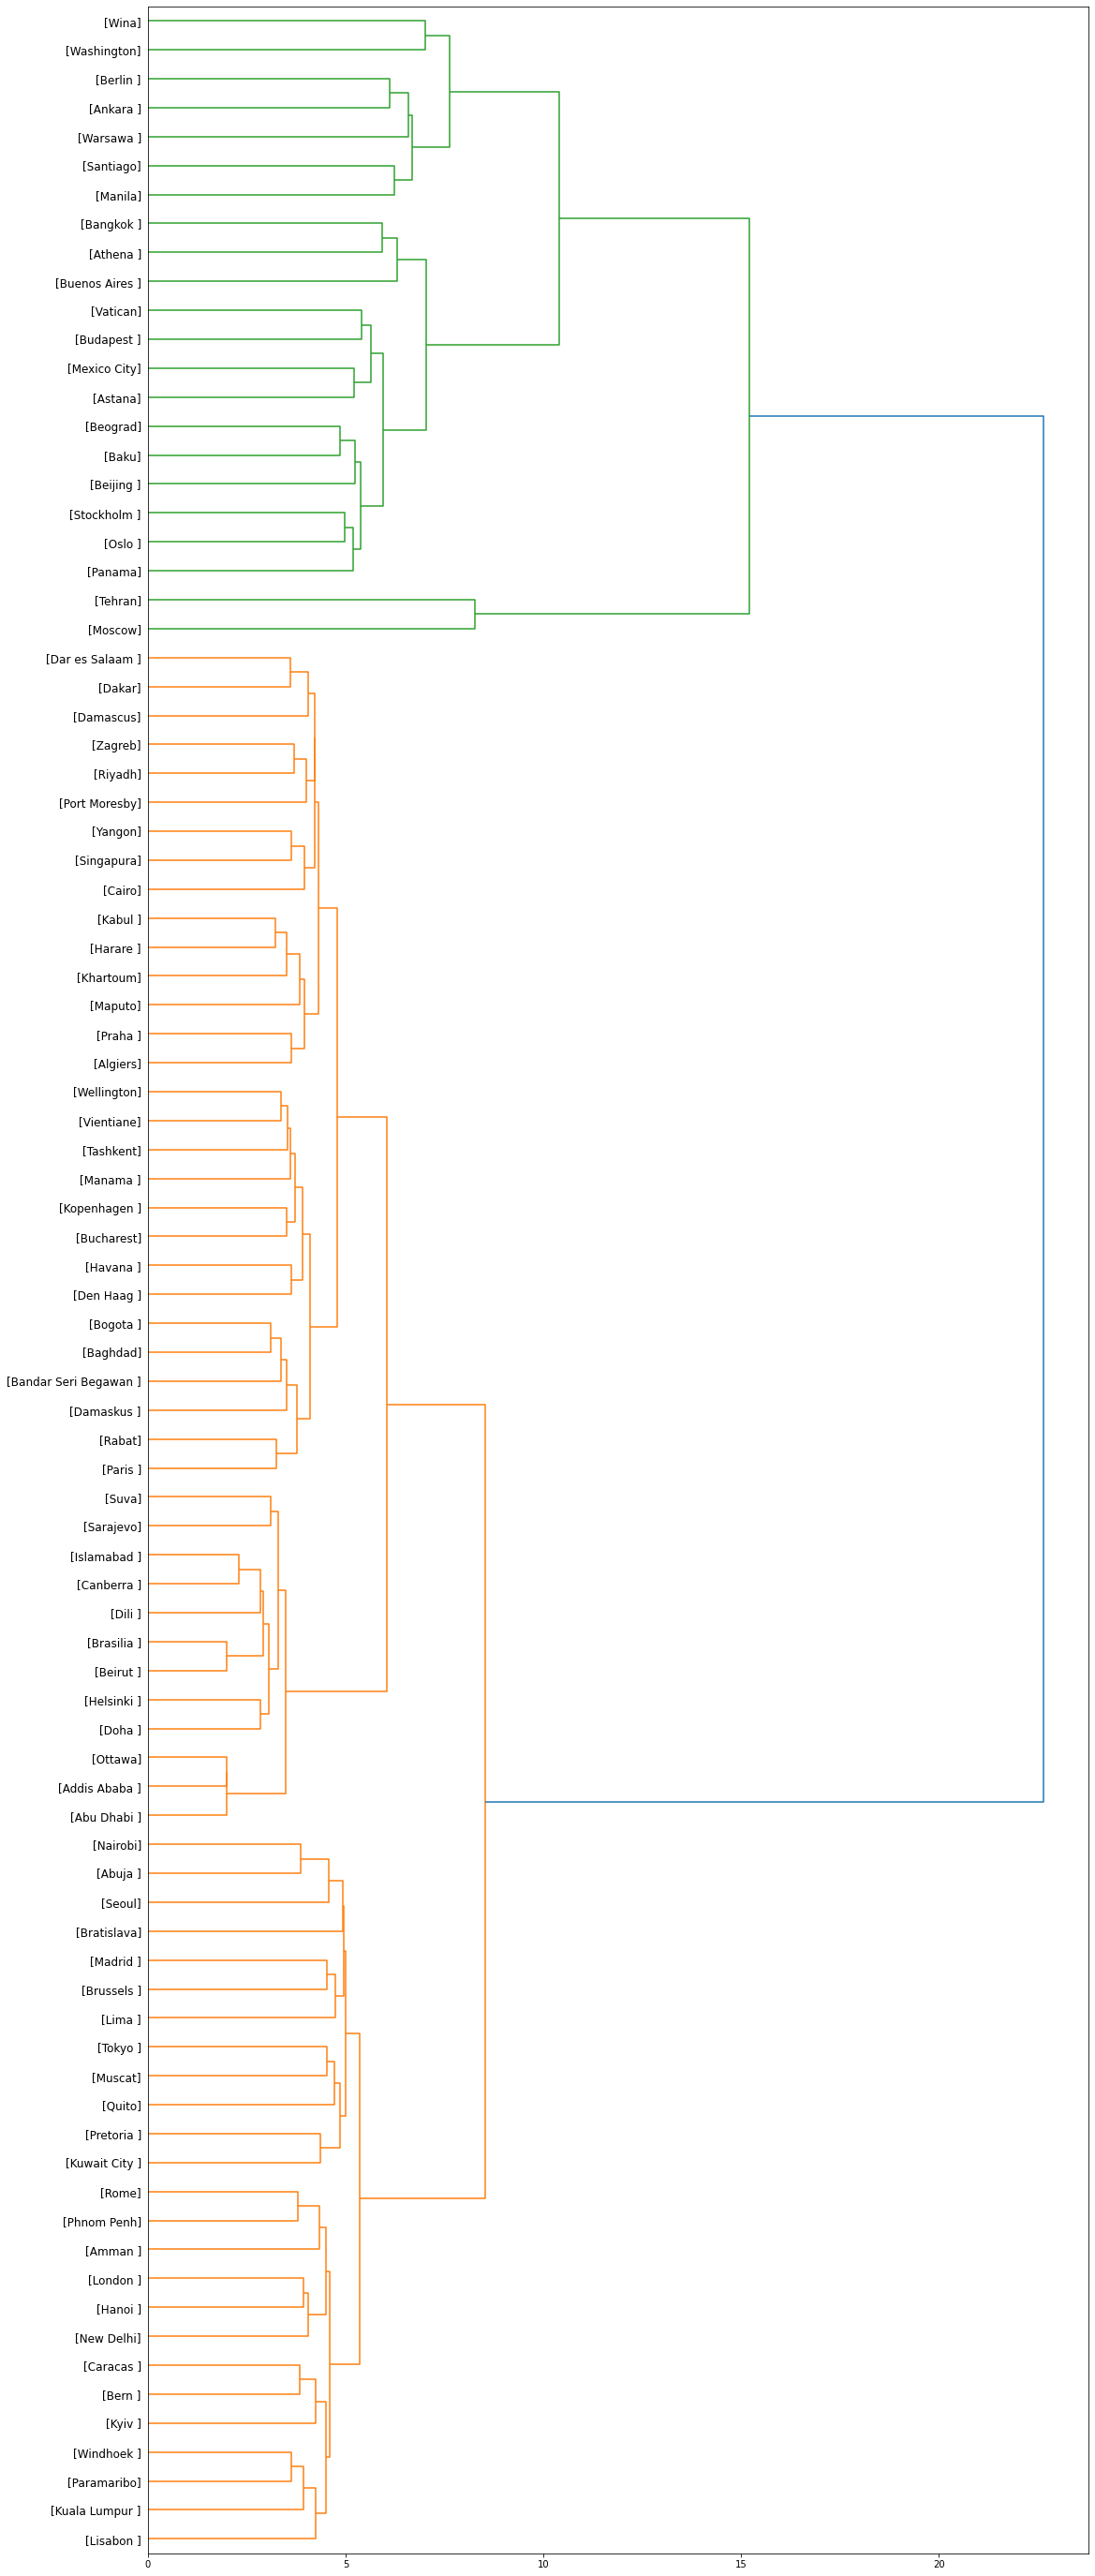

In [74]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s]' % (embassy_grouped['Embassy'][id])
    
dendro = hierarchy.dendrogram(Z_using_dist_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')